# Анализ недвижимости

## <a class="anchor" id="9th"></a> Навигация
* [1. Знакомство с данными и предобработка](#1st):
    * [Тип данных](#10th)
    * [Пропуски](#11th)
    * [Заголовки](#12th)
    * [Дубликаты](#13th)
    * [Работа с выбросами 1](#14th)
    * [Обработка аномалий](#16th)
* [2. Добавление информации из датасета region.csv](#2nd):
    * [Работа с выбросами 2](#15th)
* [3. Восстановление пропусков в столбце kitchen_area](#3rd)
* [4. Исследование рынка недвижимости в РФ за представленный период. Величина исследования - цена за м2. Обработка аномалии](#4th)
* [5. Когда выгодно покупать/продавать объект недвижимости?](#5th)
* [6. Определение от каких признаков зависит стоимость объекта недвижимости. Поиск скрытых закономерностей](#6th)
* [7. Выдвижение и проверка собственной гипотезы статистическими методами](#7th)
* [8. Создание модели прогноза цены объекта недвижимости](#8th)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

<div style="background-color: mistyrose; padding: 5px; border-radius: 100px;">
    <a class="anchor" id="1st"></a> 
    <div align = "center">
    <h1 style="color: darkred;"> 1. Знакомство с данными и предобработка:</h1

In [ ]:
df = pd.read_csv('realty_18_21.csv')
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,11


Датасет имеет `5477006` строк и `10` столбцов

## <a class="anchor" id="10th"></a> Тип данных

In [ ]:
df.info()
#нужно изменить тип данных в столбце date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
#проверим
df.dtypes

price                     int64
date             datetime64[ns]
region                    int64
building_type             int64
level                     int64
levels                    int64
rooms                     int64
area                    float64
kitchen_area            float64
object_type               int64
dtype: object

## <a class="anchor" id="11th"></a> Пропуски

In [ ]:
df.isnull().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253711
object_type           0
dtype: int64

Пропуски значения есть только в столбце `kitchen_area`, исследуем это в третьем пункте

## <a class="anchor" id="12th"></a> Заголовки

In [ ]:
df.columns

Index(['price', 'date', 'region', 'building_type', 'level', 'levels', 'rooms',
       'area', 'kitchen_area', 'object_type'],
      dtype='object')

In [ ]:
#Проверим, есть ли в заголовках русские буквы
columns = df.keys().tolist()

for column in columns:
    print(column.isascii())

True
True
True
True
True
True
True
True
True
True


Подводных камней в заголовках в виде лишних пробелов и русских букв не замечено

## <a class="anchor" id="13th"></a>  Дубликаты

Разберемся с явными дубликатами

In [ ]:
df.duplicated().sum()

235655

In [ ]:
#найдем их
df.loc[df.duplicated(keep=False)]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
402,1300000,2018-09-08,9654,1,5,10,1,41.36,10.88,11
403,1750000,2018-09-08,9654,1,9,10,1,58.03,17.00,1
420,1050000,2018-09-08,9654,1,3,10,1,33.58,5.00,1
421,1700000,2018-09-08,9654,1,1,10,1,58.03,17.00,1
433,940240,2018-09-08,9654,1,4,10,1,33.58,5.00,11
...,...,...,...,...,...,...,...,...,...,...
5475660,5000000,2021-05-01,3991,1,7,9,3,65.00,8.60,1
5475971,3900000,2021-05-01,2604,3,4,10,2,48.00,9.00,1
5476318,5280000,2021-05-01,2661,2,14,18,1,44.00,10.00,1
5476380,6400000,2021-05-01,3991,3,6,9,2,87.00,19.50,1


In [ ]:
#удалим явные дубликаты, т.к они составляют всего 4% от нашего датасета
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
#осуществим проверку
df.duplicated().sum()

0

In [ ]:
df.shape

(5241351, 10)

## <a class="anchor" id="14th"></a>  Работа с выбросами 1

In [ ]:
df.head(1)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1


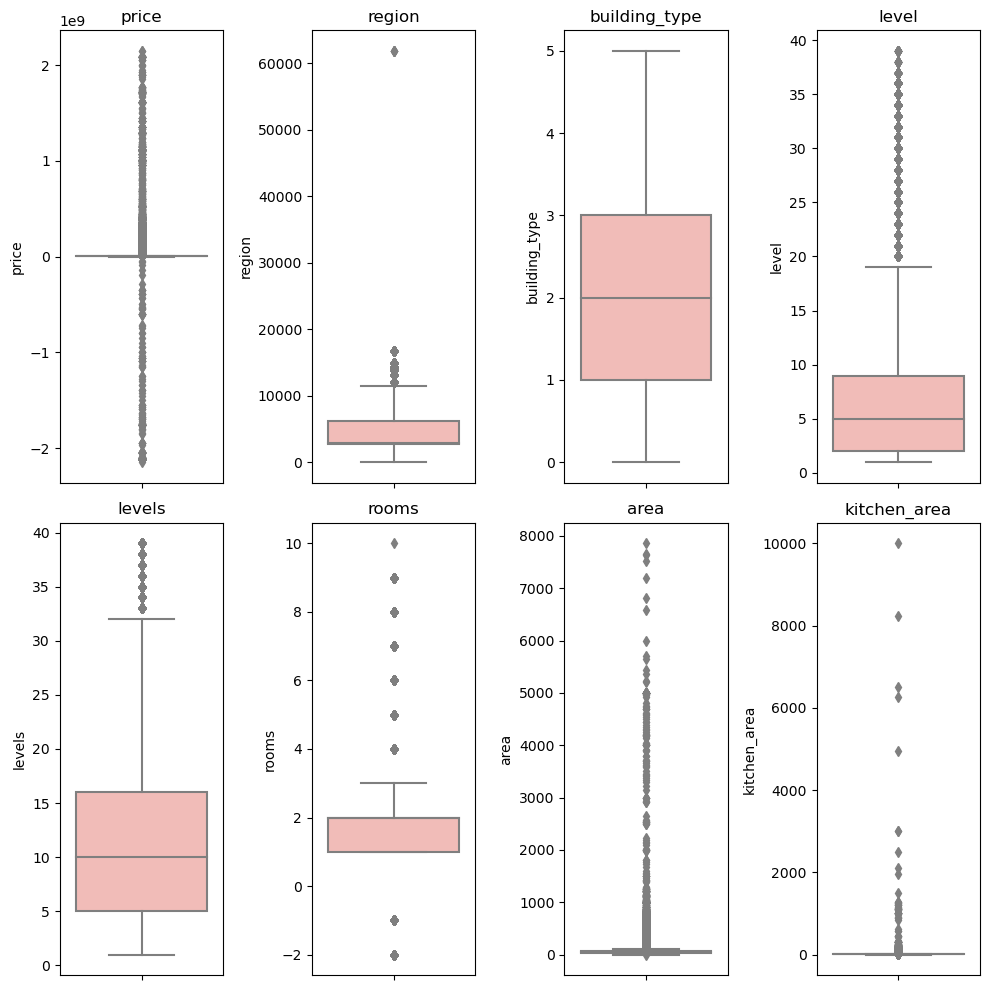

In [ ]:
#построим общие боксплоты, может найдем какие-то аномалии
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

numeric_columns = numeric_columns[:-1]

plt.figure(figsize=(10, 10))
sns.set_palette('Pastel1')

num_columns = len(numeric_columns)

n_rows = (num_columns // 4) + (num_columns % 4 > 0)  
n_cols = min(num_columns, 4)  

for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

- В столбце `price` есть отрицательные значения 
- В столбце `rooms` есть отрицательные значения
- В столбце `kitchen_area` есть значения, превышающие значения столбца `area`. Получается противоречие
- Непонятный выброс в столбце `reg_code`. Возможно, это просто специфика региона, но, в любом случае, стоит обратить на это внимание в третьем пункте при объединении датасетов

Будет логичнее удалять выбросы по регионам, чтобы избежать удаления городов-миллионников. Сделаем это после второго пункта, когда добавим информацию о регионах.

## <a class="anchor" id="16th"></a> Обработка аномалий

**Отрицательные значения в столбце `price`**

In [ ]:
#Посмотрим на отрицательную цену
df[df['price'] < 0]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
43244,-1633967296,2018-09-14,5520,1,13,22,1,38.92,NaN,11
43245,-1633967296,2018-09-14,5520,1,14,22,1,38.92,17.26,11
190680,-429242296,2018-10-04,9654,2,5,25,2,57.27,9.31,11
198061,-1744967296,2018-10-06,9654,3,4,5,2,45.00,6.00,1
222924,-2053850296,2018-10-10,9654,1,2,10,3,87.39,12.92,11
...,...,...,...,...,...,...,...,...,...,...
5147253,-2041757296,2021-04-23,2604,3,2,4,1,41.08,9.31,11
5147655,-1794967296,2021-04-23,81,1,4,5,2,56.00,9.00,1
5163220,-1494967296,2021-04-26,2843,3,3,3,1,45.00,17.00,11
5184182,-2094967296,2021-04-27,3991,3,14,19,1,30.00,8.00,1


Т.к цены очень большие по модулю, а площадь маленькая, то даже будь эти цены положительными, они бы не соответствовали площади квартиры.

In [ ]:
#Посмотрим отдельно нулевую цену
df[df['price'] == 0]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
171456,0,2018-10-01,6817,3,5,10,3,104.0,15.0,1
363609,0,2018-10-31,2922,1,5,5,2,55.0,8.0,1
501989,0,2018-11-21,3991,1,2,9,3,94.0,16.0,1
1119130,0,2019-02-20,3230,3,1,3,2,57.0,9.0,11
1220974,0,2019-03-04,2604,3,1,2,2,40.5,5.3,1
1333916,0,2019-03-23,5520,3,5,5,4,61.4,11.4,1
1639565,0,2019-05-09,81,3,2,3,-1,109.5,20.0,11
1705471,0,2019-05-22,3,3,1,6,-1,137.0,18.0,1
1765799,0,2019-05-31,81,2,12,17,-1,46.6,12.0,11
1817502,0,2019-06-09,2843,3,1,1,2,65.0,NaN,1


Вряд ли квартиры могут стоить 0 рублей, возможно они куплены по договору дарения или наследства. 

In [ ]:
df[df['price'] == 0].shape

(23, 10)

Строк с отрицательной и нулевой ценой всего 334, поэтому можем их удалить, чтобы избежать недопониманий.

In [ ]:
#Перезапишем датасет без отрицательной цены
df = df[df['price'] > 0].reset_index(drop=True).copy()

In [ ]:
#Проверим размер датасета
df.shape

(5241017, 10)

**Отрицательные значения в столбце `rooms`**

In [ ]:
df['rooms'].unique()
#Непонятное значение -2

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, -2, 10], dtype=int64)

In [ ]:
#Посмотрим на отрицательные комнаты, учитывая, что (-1) - студия.
df[df['rooms'] < -1]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
61890,24912000,2018-09-17,2843,2,22,22,-2,415.2,40.0,11
87350,25500000,2018-09-18,2661,3,1,7,-2,360.0,22.0,1
108575,3150000,2018-09-21,2661,2,2,17,-2,35.0,9.0,1
114222,4300000,2018-09-22,81,3,3,5,-2,61.0,5.6,1
138059,57000000,2018-09-26,81,3,3,3,-2,300.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...
5122726,2350000,2021-04-19,3019,4,4,5,-2,9.0,10.7,1
5139404,199000000,2021-04-21,2661,3,2,3,-2,9.0,25.0,1
5157348,36874000,2021-04-24,2661,3,2,4,-2,9.0,19.7,1
5196830,5200000,2021-04-29,81,2,7,17,-2,9.0,10.7,1


Судя по площади, которая может быть как очень большой, так и очень маленькой, не очень понятно, какой тип комнаты это может быть. При такой фильтрации также возникают значения площади кухни, превышающие общую площадь квартиры. Число квартир со значением комнат (-2) равно 343, поэтому можем исключить их из датасета.

In [ ]:
#Перезапишем датасет без отрицательной цены
df = df[df['rooms'] >= -1].reset_index(drop=True).copy()

In [ ]:
#Проверим размер датасета
df.shape

(5240674, 10)

**Противоречие в столбцах `kitchen_area` и `area`**

In [ ]:
#Посмотрим на ситуации, когда площадь кухни больше общей площади объекта недвижимости
df[df['kitchen_area'] > df['area']]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
501,4599000,2018-09-08,9654,3,6,10,2,5.60,7.70,1
668,1350000,2018-09-08,9654,1,5,10,1,13.78,48.02,11
4444,1570000,2018-09-08,1010,3,4,5,1,32.00,65.00,1
5656,1740900,2018-09-09,9654,1,4,10,2,58.03,78.00,11
5946,1350000,2018-09-09,9654,1,5,10,1,13.78,48.02,11
...,...,...,...,...,...,...,...,...,...,...
4865420,37884000,2021-03-01,2871,2,3,6,3,172.00,340.00,11
4925687,950000,2021-03-16,3991,3,1,3,1,15.00,23.00,1
4985913,2300000,2021-03-26,3991,3,1,5,1,31.00,60.00,1
5219608,2750000,2021-04-30,9648,4,3,3,2,45.00,45.60,1


Скорее всего были допущены ошибки в процессе составления данных, либо площадь кухни и общая площадь перепутаны. В любом случае лучше удалить сложившиеся противоречивые данные, чтобы избежать несостыковок в дальнейшей работе. Число таких ситуаций 2859, поэтому строки можно удалить

In [ ]:
#Отдельно посмотрим на ситуации, когда площадь кухни равна общей площади объекта недвижимости
df[df['kitchen_area'] == df['area']]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
3010,950000,2018-09-08,9654,3,2,9,-1,22.0,22.0,1
4056,1200000,2018-09-08,2359,3,3,9,-1,23.0,23.0,11
7293,450000,2018-09-09,6171,3,1,2,1,30.6,30.6,1
12479,1600000,2018-09-10,2604,3,1,5,-1,26.5,26.5,1
16017,1650000,2018-09-10,10160,1,3,5,2,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...
5178504,1600000,2021-04-27,9654,1,10,17,-1,20.0,20.0,1
5213170,1958000,2021-04-30,5282,3,5,14,1,37.0,37.0,1
5223149,2300000,2021-04-30,3991,0,5,16,1,23.5,23.5,1
5224409,1050000,2021-04-30,3991,0,4,5,1,18.0,18.0,1


Возможно площадь кухни была бы приближена к общей площади квартиры в случае со студиями, однако в общую площадь также должны входить туалет и ванная, что вряд ли не отделено от кухни. Поэтому эти данные лучше удалить, тем более они занимают лишь малую часть датасета (1209 строк)

In [ ]:
#Перезапишем датасет без противоречий с площадами
df = df[~(df['kitchen_area'] >= df['area'])].reset_index(drop=True).copy()

In [ ]:
#Проверим размер датасета
df.shape

(5236606, 10)

**Рассмотрим возможное противоречие в столбцах `level` и `levels`**

In [ ]:
df[df['level'] > df['levels']]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
25903,1850000,2018-09-12,3870,3,17,13,1,37.00,10.00,1
35415,1100000,2018-09-13,9654,3,4,1,1,30.00,8.00,1
114032,700000,2018-09-22,2722,3,2,1,2,40.00,11.00,1
143570,3200000,2018-09-27,11171,2,4,3,1,31.00,10.00,1
157350,1050000,2018-09-28,2843,4,2,1,2,54.00,10.00,1
...,...,...,...,...,...,...,...,...,...,...
4706427,4750000,2021-01-19,2843,4,11,10,2,54.00,6.00,1
4937042,6984180,2021-03-18,81,3,4,3,2,57.80,11.68,11
4937046,7164620,2021-03-18,81,3,4,3,2,78.84,11.68,11
4937854,4136487,2021-03-18,81,3,4,3,1,48.40,9.01,11


In [ ]:
#Перезапишем датасет
df = df[df['level'] <= df['levels']].reset_index(drop=True).copy()

In [ ]:
#Проверим размер
df.shape

(5235945, 10)

<div class="alert alert-block alert-success">
<b>Вывод:</b><br>
    1. Датасет очень большой. <br>
    2. Были ошибки в типах данных, а также присутствовали дубликаты. Ошибку устранили, дубликаты удалили, потому что они составляют всего 4% от всего датасета. <br>
    3. В датасете присутствуют пропущенные значения в столбце kitchen_area, но мы разберемся подробнее с этим в третьем пункте. <br>
    4. При построении боксплотов были найдены следующие аномалии: <br>
- В столбце `price` есть отрицательные значения <br>
- В столбце `rooms` есть отрицательные значения <br>
- В столбце `kitchen_area` есть значения, превышающие значения столбца `area`. Получается противоречие <br>
- Непонятный выброс в столбце `reg_code`. Возможно, это просто специфика региона, но, в любом случае, стоит обратить на это внимание <br>
- - В столбце `level` есть значения, превышающие значения столбца `levels`. Получается противоречие <br>
    5. Аномалии были устранены при помощи перезаписи датасета <br>
    6. По усам на боксплотах можно сделать вывод об ассиметрии распределения в столбцах. <br>
    7. Будет логичнее удалять выбросы по регионам, чтобы избежать удаления городов-миллионников. Сделаем это после второго пункта, когда добавим информацию о регионах.

[Вернуться к навигации](#9th)

<div style="background-color: mistyrose; padding: 5px; border-radius: 100px;">
    <a class="anchor" id="2nd"></a> 
    <div align = "center">
    <h1 style="color: darkred;">  2.  Добавление информации из датасета region.csv

In [ ]:
df.head(1)

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1


In [ ]:
region = pd.read_csv('region.csv')
region

,code,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край
...,...,...
78,16705,Магаданская область
79,69,Еврейская автономная область
80,4963,Приморский край
81,1901,Сахалинская область


In [ ]:
region.info()
#тип кода региона нужно изменить

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [ ]:
#region['code'] = region['code'].astype('int') 
#всплывает ошибка => что-то не так внутри данных

In [ ]:
#проверим уникальные значения и нйдем, что не так
region['code'].unique()

array(['2661', '3446', '3', '81', '2843', '2871', '3230', '3106', '2922',
       '2900', '2722', '6171', '4417', '5282', '5368', '5520', '6817',
       '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
       '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873, 6937', '2594', '8509', '11416',
       '11991', '5178', '13913', '6309', '5952', '6543', '2880', '5993',
       '2484', '4240', '5789', '14880', '1491', '2885', '5794', '2528',
       '4374', '4695', '2328', '5143', '2806', '14368', '5736', '7121',
       '4086', '821', '10582', '7896', '8640', '5703', '10201', '4249',
       '3153', '4189', '2814', '13098', '8894', '7929', '16705', '69',
       '4963', '1901', '61888'], dtype=object)

Непонятки со строками `'7873, 6937'` - они не разделены кавычками

In [ ]:
region.query('code == "7873, 6937"')
#Этому коду соответствует Республика Крым

,code,reg_name
36,"7873, 6937",Республика Крым


In [ ]:
#заменим двойной код на 7873
region['code'] = region['code'].replace('7873, 6937', '7873')

#добавим строку с кодом 6937, потому что в датасете с данными по недвижимости могут использоваться оба кода Республики Крым
new_row = {'code': '6937', 'reg_name': 'Республика Крым'}
new_row_region = pd.DataFrame.from_records([new_row])
region = pd.concat([region, new_row_region], ignore_index=True)

In [ ]:
#проверим уникальные значения
region['code'].unique()

array(['2661', '3446', '3', '81', '2843', '2871', '3230', '3106', '2922',
       '2900', '2722', '6171', '4417', '5282', '5368', '5520', '6817',
       '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
       '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873', '2594', '8509', '11416', '11991',
       '5178', '13913', '6309', '5952', '6543', '2880', '5993', '2484',
       '4240', '5789', '14880', '1491', '2885', '5794', '2528', '4374',
       '4695', '2328', '5143', '2806', '14368', '5736', '7121', '4086',
       '821', '10582', '7896', '8640', '5703', '10201', '4249', '3153',
       '4189', '2814', '13098', '8894', '7929', '16705', '69', '4963',
       '1901', '61888', '6937'], dtype=object)

In [ ]:
#проверим число кодов и число названий регионов
region['code'].nunique()

84

In [ ]:
region['reg_name'].nunique()

83

Число кодов больше из-за того, что у Республики Крым теперь два кода: 7873 и 6937

Вернемся к типу данных

In [ ]:
region['code'] = region['code'].astype('int')

#проверим типы данных
region.dtypes

code         int32
reg_name    object
dtype: object

Объединим датасеты `df` и `region`

In [ ]:
#для дальнейшего удобства чтения датафрейма и использования функции merge(), изменим название столбца с кодами регионов
df = df.rename(columns={'region':'reg_code'})
df.head(1)

,price,date,reg_code,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1


In [ ]:
region = region.rename(columns={'code':'reg_code'})
region.head(1)

,reg_code,reg_name
0,2661,Санкт-Петербург


In [ ]:
#Объединим датасеты и для удобства вставим новый столбец с названием региона сразу после имеющегося столбца с кодом региона 
all_columns = df.columns.to_list()

df = df.merge(region, how='left')

for column in all_columns:
    if column == "reg_code":
        all_columns[all_columns.index(column) + 1:all_columns.index(column) + 1] = ["reg_name"]
        break

df = df[all_columns]
df.head(1)

,price,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


<div class="alert alert-block alert-success">
<b>Вывод:</b><br>
    1. В новом датасете с регионами была проблема с кодом региона, которая мешала исправить тип данных в столбце 'code'. <br>
    2. После устранения проблемы и исправления типа данных, были объеденины два датасета - в основную информацию по недвижимости добавили информацию с названием регионов в соответствии с их кодами. <br>

[Вернуться к навигации](#9th)

## <a class="anchor" id="15th"></a>  Работа с выбросами 2

In [ ]:
df.head(1)

,price,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


Рассмотрим выбросы по цене у каждого региона

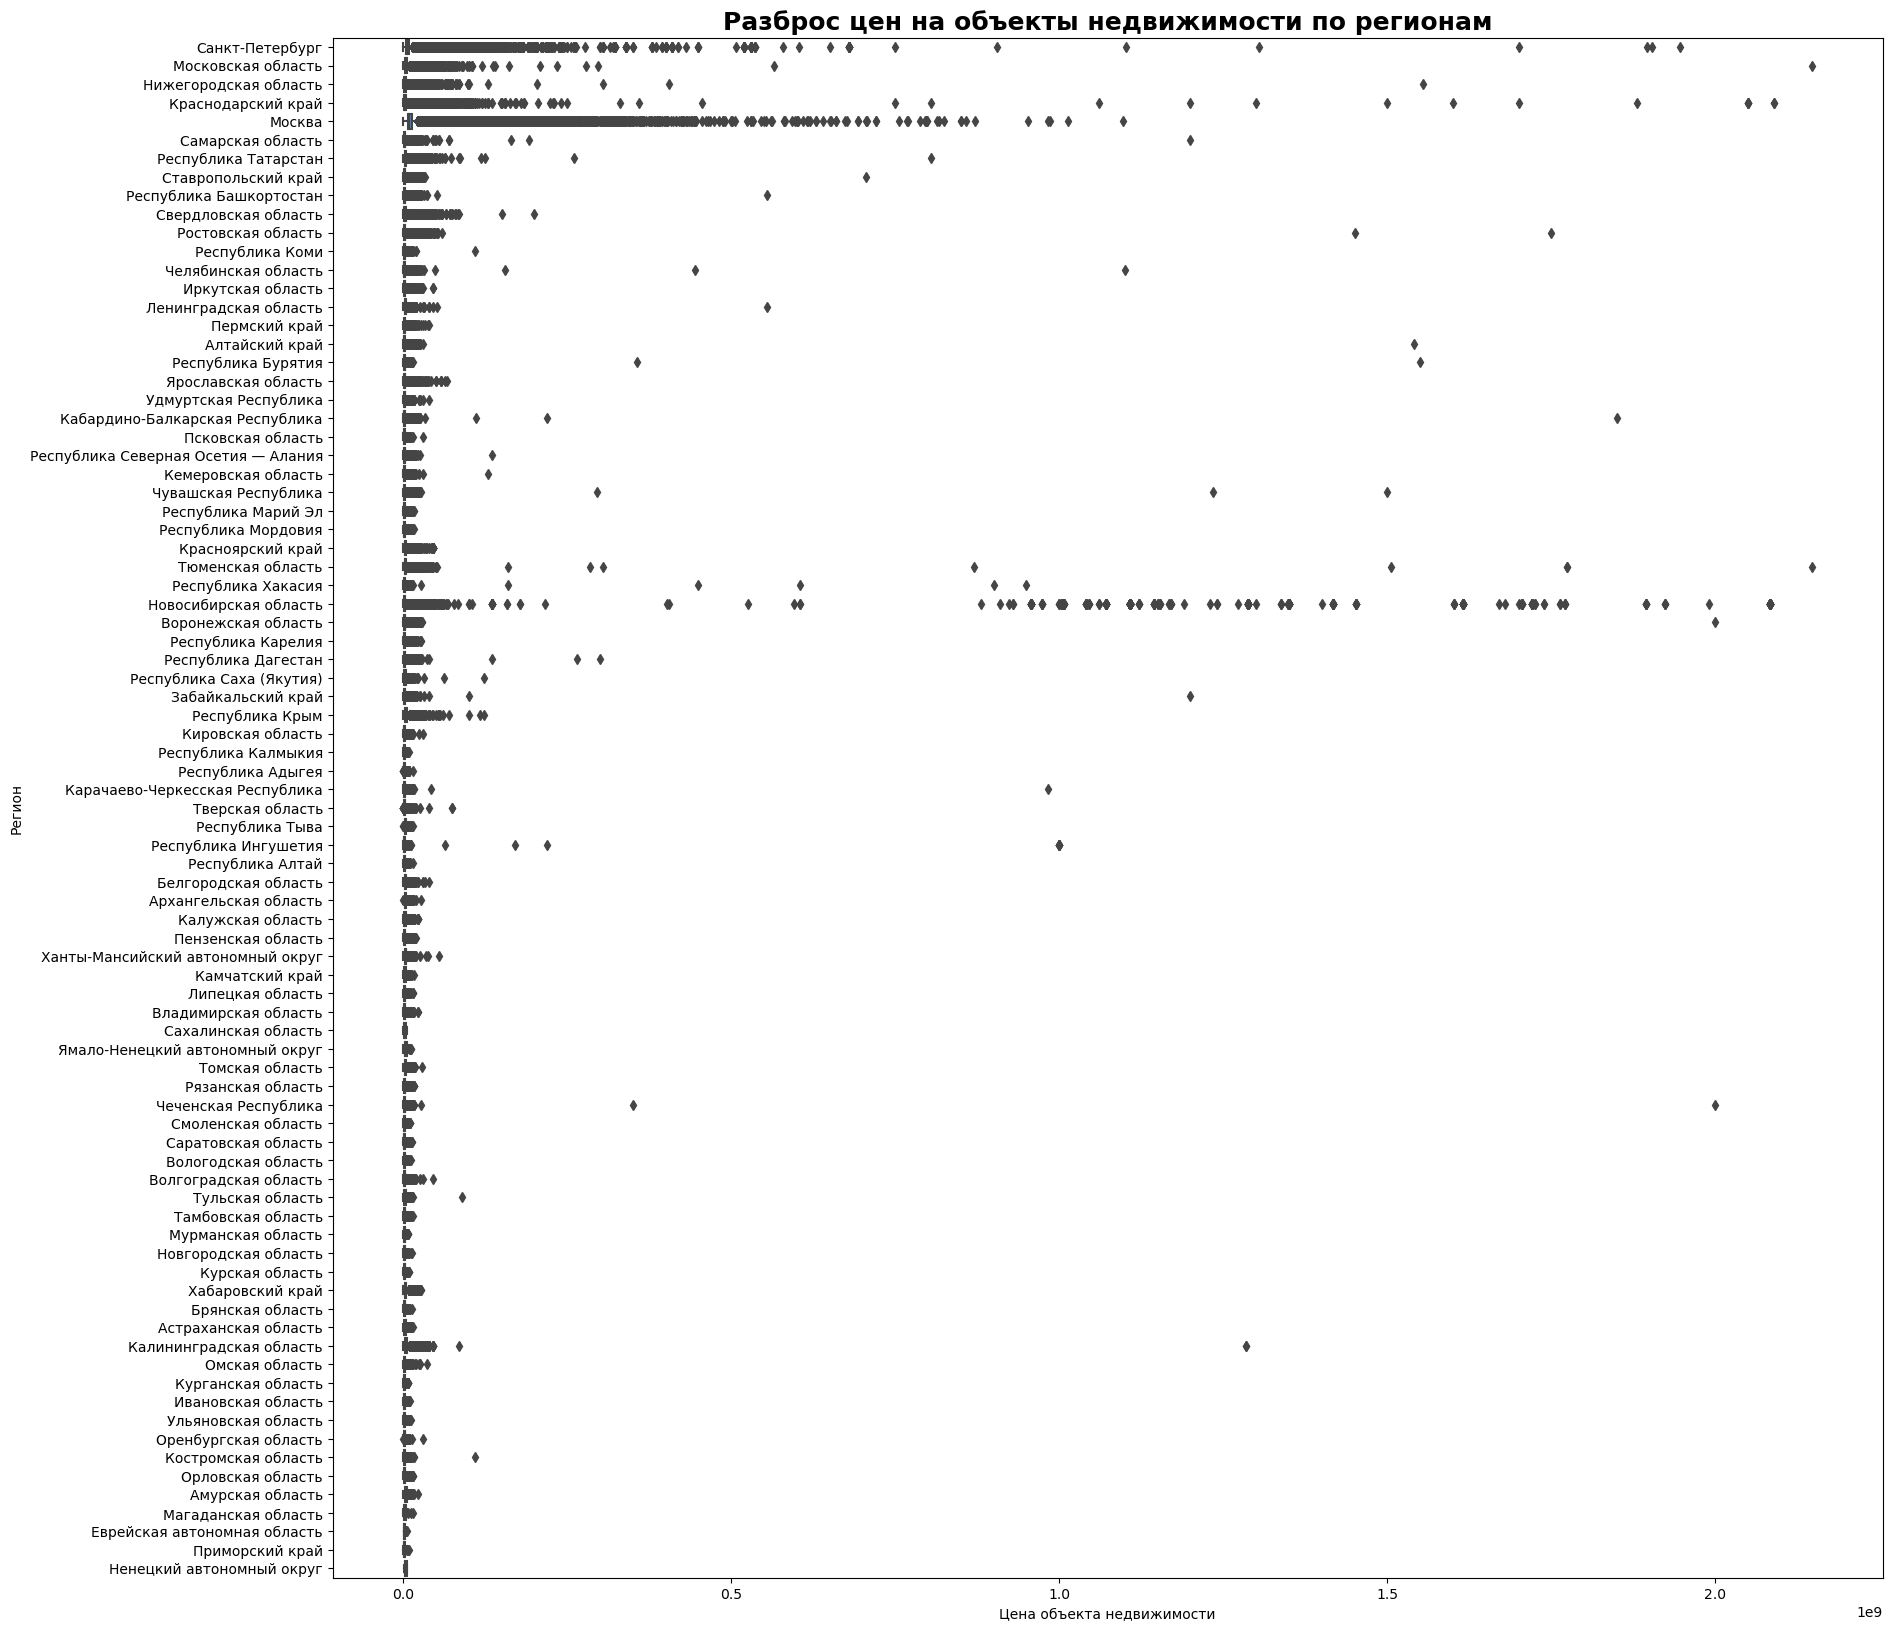

In [ ]:
reg_price = df[['price','reg_name']]

plt.figure(figsize=(20, 20))
sns.boxplot(data=reg_price, y='reg_name', x='price', palette="vlag").set(xlabel='Цена объекта недвижимости', ylabel='Регион')
plt.title('Разброс цен на объекты недвижимости по регионам', fontsize=18, fontweight="bold")
plt.show()

Судя по боксплотам средняя стоимость недвижимости в Москве превышает среднюю стоимость недвижимости в регионах, что ожидаемо. Из интересного - характер выбросов в Новосибирской области.

Удалим выбросы по регионам

In [ ]:
#Посмотрим на ско и среднее
df.groupby('reg_name')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
reg_name,,,,,,,,
Алтайский край,73343.0,2.227550e+06,5.822458e+06,105.0,1460000.0,1980000.0,2650000.0,1.540000e+09
Амурская область,2163.0,4.620460e+06,2.003385e+06,2400.0,3350000.0,4328000.0,5600000.0,2.200000e+07
Архангельская область,3957.0,3.788901e+06,1.741893e+06,15000.0,2750000.0,3585624.0,4570000.0,2.800000e+07
Астраханская область,1787.0,2.931846e+06,1.733208e+06,2100.0,1740000.0,2479400.0,3750000.0,1.500000e+07
Белгородская область,46672.0,3.316808e+06,1.614306e+06,3400.0,2290000.0,3000000.0,3950000.0,4.000000e+07
...,...,...,...,...,...,...,...,...
Челябинская область,154080.0,2.041107e+06,3.252631e+06,150.0,1350000.0,1780000.0,2350000.0,1.100000e+09
Чеченская Республика,2448.0,3.694784e+06,4.101113e+07,2.0,1650000.0,2300000.0,3300000.0,2.000000e+09
Чувашская Республика,56105.0,2.389841e+06,8.395717e+06,450.0,1530000.0,2050000.0,2743620.0,1.500000e+09


In [ ]:
#Найдем границы усов и число выбросов для каждого региона
names = df['reg_name'].unique()

for name in names:
    reg = df[df['reg_name'] == name]['price'] #отсортируем регионы друг от друга
    
    q75 = np.percentile(reg, 75) #найдем границы усов
    q25 = np.percentile(reg, 25)
    iqr = q75 - q25
    ejection_h = q75 + 1.5*iqr
    ejection_l = q25 - 1.5*iqr
    print (name, ejection_h, ejection_l) 
    
    n_ejection = reg[(reg > ejection_h) | (reg < ejection_l)].count() #найдем число выбросов 
    print('Число выбросов в регионе', name, ':', n_ejection)
    
    ejection_perc = ((n_ejection / reg.count()) * 100).round(2) #найдем процент выбросов от всего датасета
    print('Процент выбросов от всего датасета составляет:', ejection_perc, '\n')

Санкт-Петербург 15441760.0 -2210712.0
Число выбросов в регионе Санкт-Петербург : 37747
Процент выбросов от всего датасета составляет: 8.27 

Московская область 10407425.0 -1444455.0
Число выбросов в регионе Московская область : 14703
Процент выбросов от всего датасета составляет: 2.96 

Нижегородская область 7375000.0 -1225000.0
Число выбросов в регионе Нижегородская область : 6527
Процент выбросов от всего датасета составляет: 6.52 

Краснодарский край 7000000.0 -1000000.0
Число выбросов в регионе Краснодарский край : 41349
Процент выбросов от всего датасета составляет: 6.55 

Москва 23275136.25 -2791893.75
Число выбросов в регионе Москва : 36030
Процент выбросов от всего датасета составляет: 8.31 

Самарская область 5937500.0 -842500.0
Число выбросов в регионе Самарская область : 3971
Процент выбросов от всего датасета составляет: 4.97 

Республика Татарстан 7180000.0 -500000.0
Число выбросов в регионе Республика Татарстан : 11125
Процент выбросов от всего датасета составляет: 4.86 


In [ ]:
#У многих найденных усов нижняя граница отрицательна. Найдем экстримальные выбросы
names = df['reg_name'].unique()
count = 0

for name in names:
    reg = df[df['reg_name'] == name]['price'] #отсортируем регионы друг от друга
    
    reg_h = np.percentile(reg, 99.9) #определим границу значений, при percentile = 99.9, чтобы найти экстримальные выбросы
    print(name, reg_h)
    
    reg_count = reg[(reg > reg_h)].count() #определим число экстримальных выбросов
    count += reg_count
    print('Число экстримальных выбросов в регионе', name, ':', reg_count) 
    
    ejection_perc1 = ((reg_count / reg.count()) * 100).round(2) #найдем процент экстримальных выбросов от всего датасета
    print('Процент экстримальных выбросов составляет:', ejection_perc1, '\n')
print('Общее число выбросов:', count)

Санкт-Петербург 120000000.0
Число экстримальных выбросов в регионе Санкт-Петербург : 432
Процент экстримальных выбросов составляет: 0.09 

Московская область 24000000.0
Число экстримальных выбросов в регионе Московская область : 472
Процент экстримальных выбросов составляет: 0.1 

Нижегородская область 40000000.0
Число экстримальных выбросов в регионе Нижегородская область : 97
Процент экстримальных выбросов составляет: 0.1 

Краснодарский край 40000000.0
Число экстримальных выбросов в регионе Краснодарский край : 626
Процент экстримальных выбросов составляет: 0.1 

Москва 241480345.0
Число экстримальных выбросов в регионе Москва : 417
Процент экстримальных выбросов составляет: 0.1 

Самарская область 19500000.0
Число экстримальных выбросов в регионе Самарская область : 79
Процент экстримальных выбросов составляет: 0.1 

Республика Татарстан 23325399.873007357
Число экстримальных выбросов в регионе Республика Татарстан : 229
Процент экстримальных выбросов составляет: 0.1 

Ставропольск

In [ ]:
#Теперь удалим наши 5115 выбросов
names = df['reg_name'].unique()

for name in names:
    reg = df[df['reg_name'] == name]['price'] #отсортируем регионы друг от друга
    reg_h = np.percentile(reg, 99.9)
    
    df = df[~((df['reg_name'] == name) & (df['price'] > reg_h))].reset_index(drop=True)

In [ ]:
df.shape

(5230830, 11)

Проверим, что получилось на боксплотах

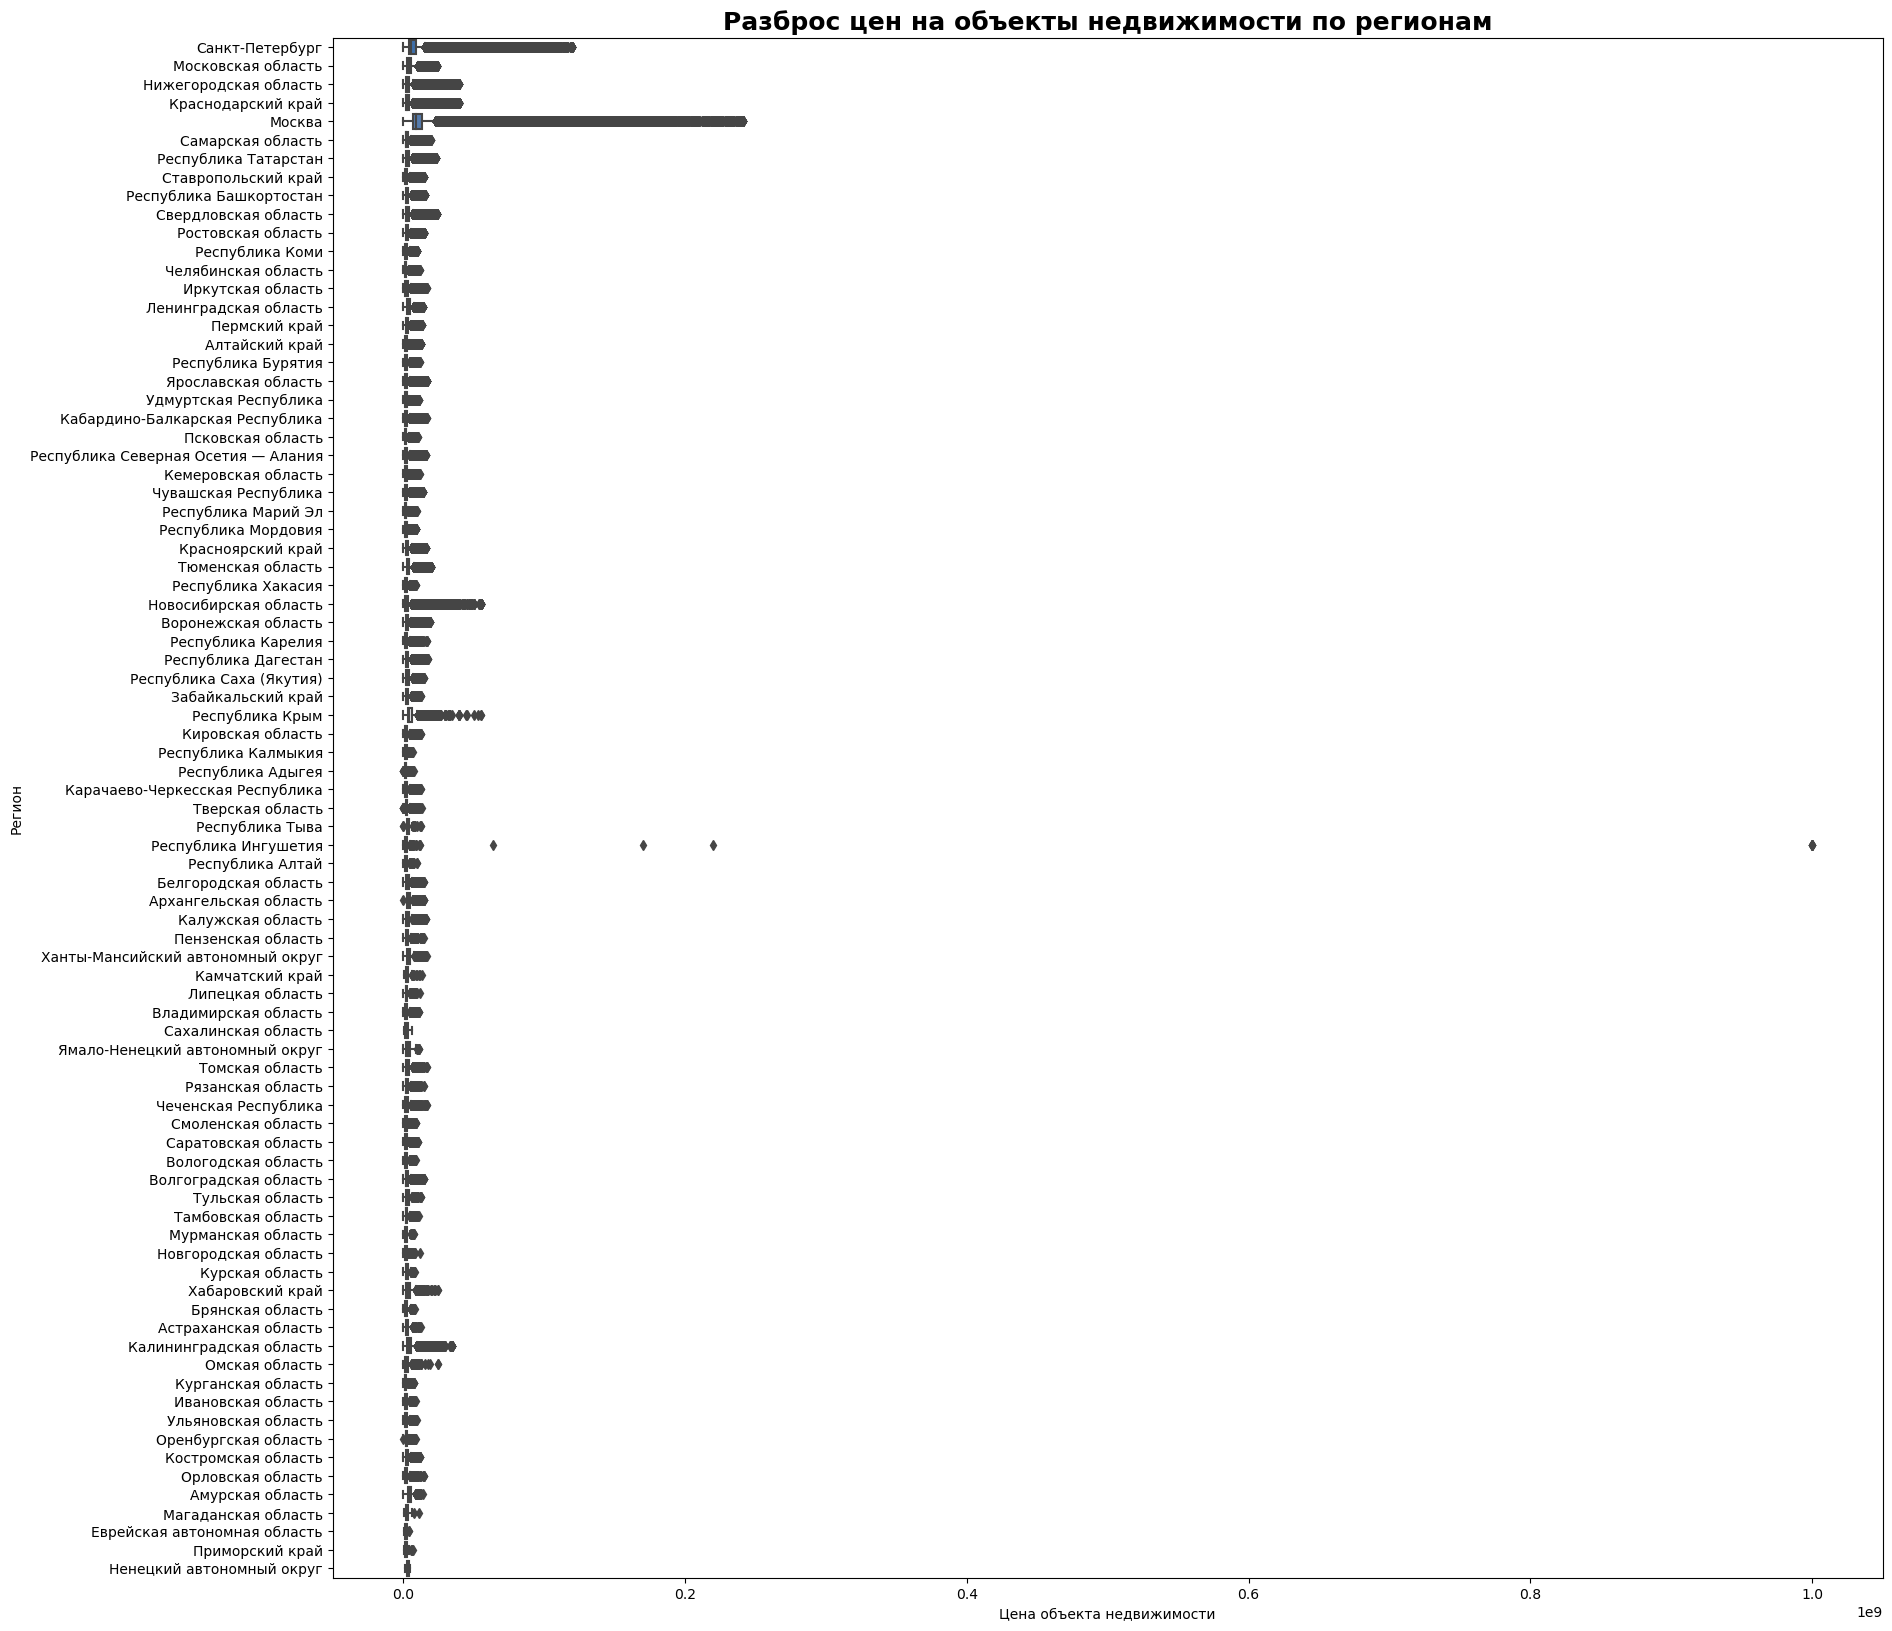

In [ ]:
reg_price = df[['price','reg_name']]

plt.figure(figsize=(20, 20))
sns.boxplot(data=reg_price, y='reg_name', x='price', palette="vlag").set(xlabel='Цена объекта недвижимости', ylabel='Регион')
plt.title('Разброс цен на объекты недвижимости по регионам', fontsize=18, fontweight="bold")
plt.show()

В республике Ингушетия явно остались экстримальные выбросы, но значение границы при 99.9 процентиле равно 999999999, что вызывает недоверие. Обработаем этот выброс вручную

In [ ]:
ingush = df[df['reg_name'] == 'Республика Ингушетия']['price'] #отсортируем регионы друг от друга
ingush_h = np.percentile(reg, 99.9)

ingush_h
#сейчас граница уже выглядит адекеватной

5996800.0

In [ ]:
#определим число экстримальных выбросов
ingush_count = ingush[(ingush > ingush_h)].count() #определим число экстримальных выбросов
print('Число экстримальных выбросов в регионе', name, ':', ingush_count)

Число экстримальных выбросов в регионе Ненецкий автономный округ : 20


In [ ]:
#удалим выброс
df = df[~((df['reg_name'] == 'Республика Ингушетия') & (df['price'] > ingush_h))].reset_index(drop=True)

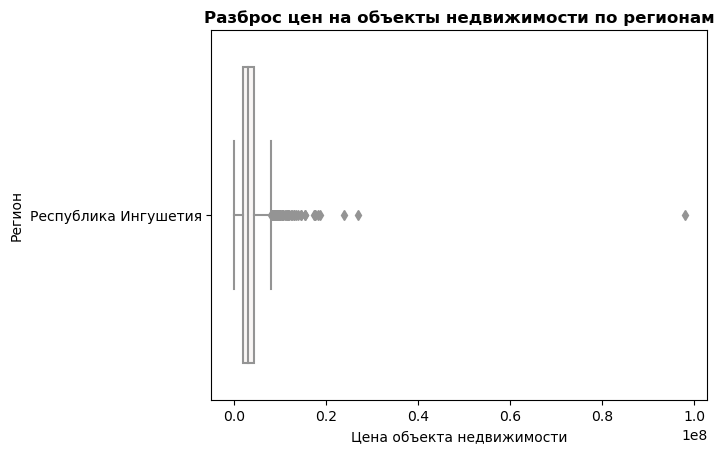

In [ ]:
sns.boxplot(data=reg_price, y=df[df['reg_name'] == 'Республика Ингушетия']['reg_name'], x='price', palette="vlag").set(xlabel='Цена объекта недвижимости', ylabel='Регион')
plt.title('Разброс цен на объекты недвижимости по регионам', fontsize=12, fontweight="bold")
plt.show()

In [ ]:
#проверим
df[(df['reg_name'] == 'Республика Ингушетия') & (df['price'] > 5996800)]

,price,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type


In [ ]:
#проверим размер датасета
df.shape

(5230810, 11)

<div class="alert alert-block alert-success">
<b>Вывод:</b><br> 
    1. В датасете было 5115 выбросов по регионам, их удалили. У каждого региона свое ценообразование, из-за чего нельзя было удалять выбросы в общем. При удалении общих выбросов, если бы удалили крупные города-миллионики, датасет стал бы не репрезентативным. <br> 
    2. После проверки боксплотов по регионам, было обнаружено, что в Ингушетии метод дал сбой. Пришлось отдельно проработать выбросы в республике Ингушетия, их оказалось 20. <br> 

[Вернуться к навигации](#9th)

<div style="background-color: mistyrose; padding: 5px; border-radius: 100px;">
    <a class="anchor" id="3rd"></a> 
    <div align = "center">
    <h1 style="color: darkred;">  3. Восстановление пропусков в столбце kitchen_area

Варианты заполнения пропусков прогнозными значениями, которые я рассматриваю:

1. метод mice (многомерный способ заполнения пропущенных данных с помощью цепных уравнений) - не такой долгий как последний

2. nona(df) - требуется большая предобработка 

3. детерминированный подход (заполняем пропуски значениями, предсказанными линейной регрессией) - долгий

Таким образом, буду использовать **метод mice**

In [ ]:
df.head(1)

,price,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


In [ ]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
#Создадим датасет без даты и названия регионов, потому что с такими типами данных могут возникнуть трудности. 
mice = df.iloc[:, [0, 2, 4, 5, 6, 7, 8, 9, 10]]
mice

,price,reg_code,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2661,1,8,10,3,82.6,10.8,1
1,8650000,81,3,5,24,2,69.1,12.0,1
2,4000000,2871,1,5,9,3,66.0,10.0,1
3,1850000,2843,4,12,16,2,38.0,5.0,11
4,5450000,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...
5230805,19739760,3,1,8,17,4,93.2,13.8,11
5230806,12503160,3,2,17,32,2,45.9,6.6,11
5230807,8800000,2871,2,4,17,3,86.5,11.8,1
5230808,11831910,3,1,8,33,2,52.1,18.9,11


In [ ]:
#Посмотрим на число пропусков
mice.isna().sum()

price                 0
reg_code              0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     252371
object_type           0
dtype: int64

В столбце `kitchen_area` 252419 пропусков.

In [ ]:
#Cоздадим объект класса StandardScaler
scaler = StandardScaler()

#Cтандартизируем данные и сразу поместим их в датафрейм
mice = pd.DataFrame(scaler.fit_transform(mice), columns = mice.columns)

In [ ]:
#Создадим объект класса IterativeImputer и укажем необходимые параметры
mice_imputer = IterativeImputer(initial_strategy = 'mean', #Вначале заполним пропуски средним значением
                                estimator = LinearRegression(), #В качестве модели используем линейную регрессию
                                random_state = 42 #Добавим точку отсчета
                                )
 
#Заполним пропуски в датасете mice
mice = mice_imputer.fit_transform(mice)
 
#Вернем данные к исходному масштабу и округлим столбец kitchen_area
mice = pd.DataFrame(scaler.inverse_transform(mice), columns = df.iloc[:, [0, 2, 4, 5, 6, 7, 8, 9, 10]].columns)
mice['kitchen_area'] = mice['kitchen_area'].round(1)
mice.head(7)

,price,reg_code,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000.0,2661.0,1.0,8.0,10.0,3.0,82.6,10.8,1.0
1,8650000.0,81.0,3.0,5.0,24.0,2.0,69.1,12.0,1.0
2,4000000.0,2871.0,1.0,5.0,9.0,3.0,66.0,10.0,1.0
3,1850000.0,2843.0,4.0,12.0,16.0,2.0,38.0,5.0,11.0
4,5450000.0,81.0,3.0,13.0,14.0,2.0,60.0,10.0,1.0
5,3300000.0,81.0,1.0,4.0,5.0,1.0,32.0,6.0,1.0
6,4704280.0,3.0,2.0,1.0,25.0,1.0,31.7,6.0,11.0


In [ ]:
#Проверим
mice.isna().sum()

price            0
reg_code         0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [ ]:
#Проверим размер датасета
mice.shape

(5230810, 9)

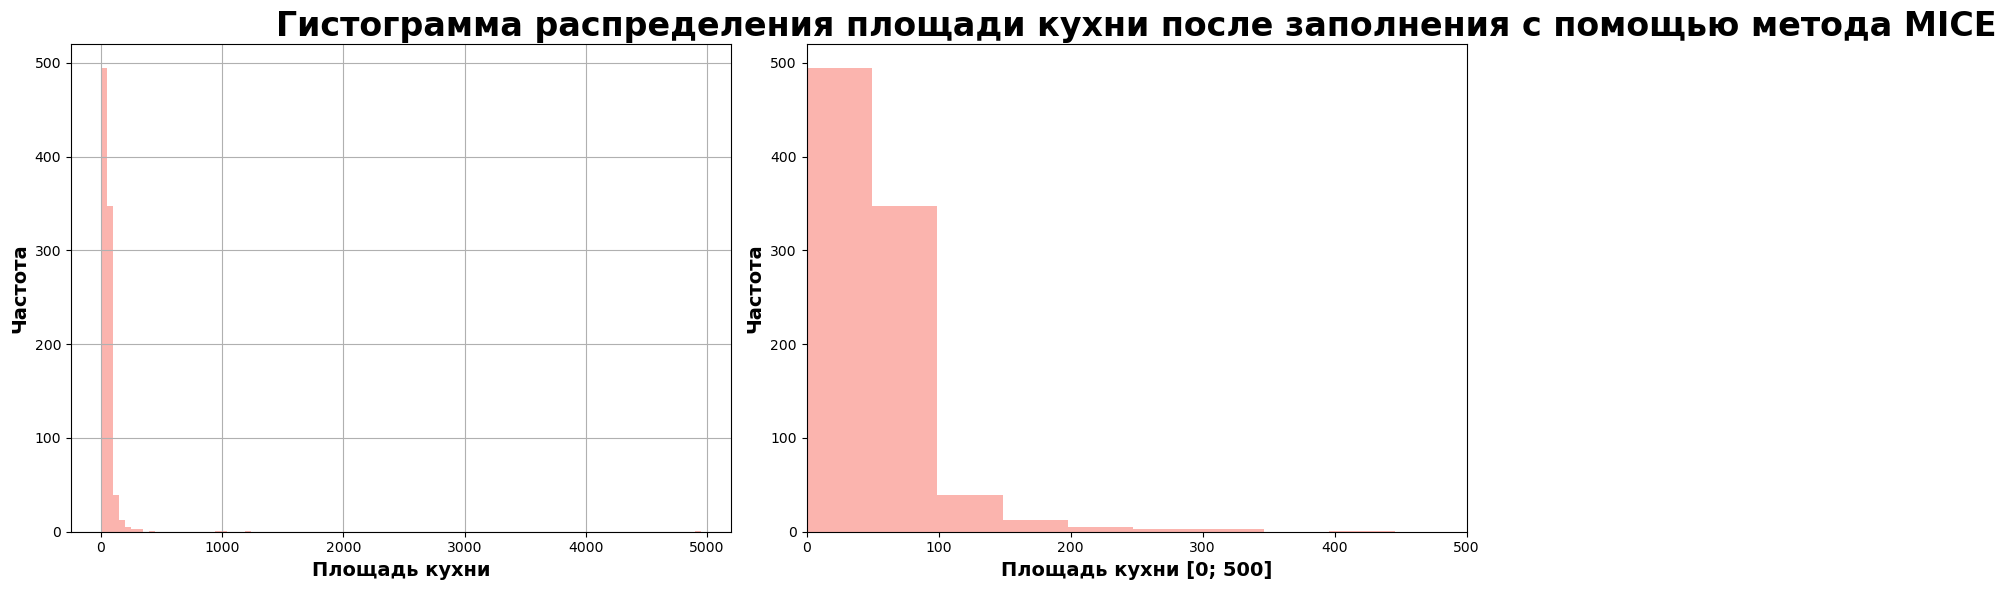

In [ ]:
#Построим гистограмму распределения площади кухни после заполнения пропусков
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.title('Гистограмма распределения площади кухни после заполнения с помощью метода MICE', fontsize=24, fontweight="bold")

#График для всех значений
axs[0].hist(mice['kitchen_area'].unique(), bins = 100)
axs[0].set_xlabel('Площадь кухни', fontsize=14, fontweight="bold")
axs[0].set_ylabel('Частота', fontsize=14, fontweight="bold")
axs[0].grid(True)

#График с масштабом от 0 до 500
axs[1].hist(mice['kitchen_area'].unique(), bins = 100)
axs[1].set_xlim(0, 500)
axs[1].set_xlabel('Площадь кухни [0; 500]', fontsize=14, fontweight="bold")
axs[1].set_ylabel('Частота', fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

Отрицательных значений после заполнения пропусков линейной регрессией не появилось. Можем вставить наши прогнозные значения в исходный датафрейм

In [ ]:
df_1 = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]] 
mice_1 = mice.iloc[:, [7]]
df_2 = df.iloc[:, [10]]

df = pd.concat([df_1, mice_1, df_2], axis=1)
df.head(1)

,price,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


In [ ]:
#Проверим размер датасета
df.shape

(5230810, 11)

In [ ]:
#Проверим пропуски
df.isna().sum()

price            0
date             0
reg_code         0
reg_name         0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

При заполнении пропусков у нас снова появились ситуации, когда площадь кухни больше общей площади объекта недвижимости.

In [ ]:
#Посмотрим на ситуации, когда площадь кухни больше общей площади объекта недвижимости
df[df['kitchen_area'] >= df['area']]

,price,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
557593,1550000,2018-11-28,2722,Республика Башкортостан,0,2,3,2,5.0,5.0,1
682639,1800000,2018-12-13,2843,Краснодарский край,2,9,24,1,4.9,8.5,1
687129,1600000,2018-12-14,9654,Новосибирская область,3,8,14,1,4.9,7.1,1
1003867,2250000,2019-02-04,2843,Краснодарский край,3,4,5,2,5.0,6.4,1
1034073,1350000,2019-02-08,5282,Челябинская область,1,5,5,1,5.0,5.2,1
...,...,...,...,...,...,...,...,...,...,...,...
3856396,4500000,2020-07-15,81,Московская область,1,1,10,2,5.3,6.9,1
4022722,2150000,2020-08-08,4982,Республика Марий Эл,3,10,10,1,4.6,6.7,1
4057055,20000000,2020-08-30,3,Москва,1,19,22,4,10.2,12.2,1
4106992,1800000,2020-09-05,2843,Краснодарский край,3,1,2,3,4.6,6.2,1


In [ ]:
#Перезапишем датасет без противоречий с площадами
df = df[~(df['kitchen_area'] >= df['area'])].reset_index(drop=True).copy()

In [ ]:
#Проверим
df.shape

(5230545, 11)

<div class="alert alert-block alert-success">
<b>Вывод:</b><br>
    1. Все найденные способы требовали от датасета только численных типов данных, из-за чего пришлось создавать датасет без  столбцов `date` и `reg_name`. <br>
    2. В качестве метода заполнения пропусков использовался метод MICE, потому что он был не таким затратным по времени, как другие два. <br>
    3. В конечном итоге были объединены полученные прогнозные значения с исходным датасетом. А также были устранены вновь появившиеся аномалии с площадью кухни. <br>

[Вернуться к навигации](#9th)

<div style="background-color: mistyrose; padding: 5px; border-radius: 100px;">
    <a class="anchor" id="4th"></a> 
    <div align = "center">
    <h1 style="color: darkred;">  4. Исследование рынка недвижимости в РФ за представленный период. Величина исследования - цена за м2.

In [ ]:
df.head(1)

,price,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


Первым делом нужно добавить столбец с ценой за квадратный метр

In [ ]:
price_m2 = (df['price']/df['area']).round(1)
df.insert(loc = 1, column = 'price_m2', value = price_m2)
df

,price,price_m2,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,2018-02-19,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1
1,8650000,125180.9,2018-02-27,81,Московская область,3,5,24,2,69.1,12.0,1
2,4000000,60606.1,2018-02-28,2871,Нижегородская область,1,5,9,3,66.0,10.0,1
3,1850000,48684.2,2018-03-01,2843,Краснодарский край,4,12,16,2,38.0,5.0,11
4,5450000,90833.3,2018-03-01,81,Московская область,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5230540,19739760,211800.0,2021-05-01,3,Москва,1,8,17,4,93.2,13.8,11
5230541,12503160,272400.0,2021-05-01,3,Москва,2,17,32,2,45.9,6.6,11
5230542,8800000,101734.1,2021-05-01,2871,Нижегородская область,2,4,17,3,86.5,11.8,1
5230543,11831910,227100.0,2021-05-01,3,Москва,1,8,33,2,52.1,18.9,11


**Теперь выделим столбцы, которые будем исследовать:** <br>
    `reg_name`: исследуем цену за м2 в каждом регионе, выделим топ-5 регионов по самым высоким ценам и топ-5 регионов по самым низким ценам <br>
    `building_type`: исследуем среднюю и медианную цену по каждому типу дома <br>
    `level`: исследуем среднюю и медианную цену по каждому этажу дома <br>
    `levels`: исследуем среднюю и медианную цену по этажности дома <br>
    `rooms`: исследуем среднюю и медианную цену по количеству комнат <br>
    `object_type`: исследуем среднюю и медианную цену по рынкам <br>
    
Средняя цена будет больше медианной за счет более высокой стоимости объектов недвижимости в крупных городах. Медианная цена будет более приближена к ценам регионов, чем средняя.

### reg_name

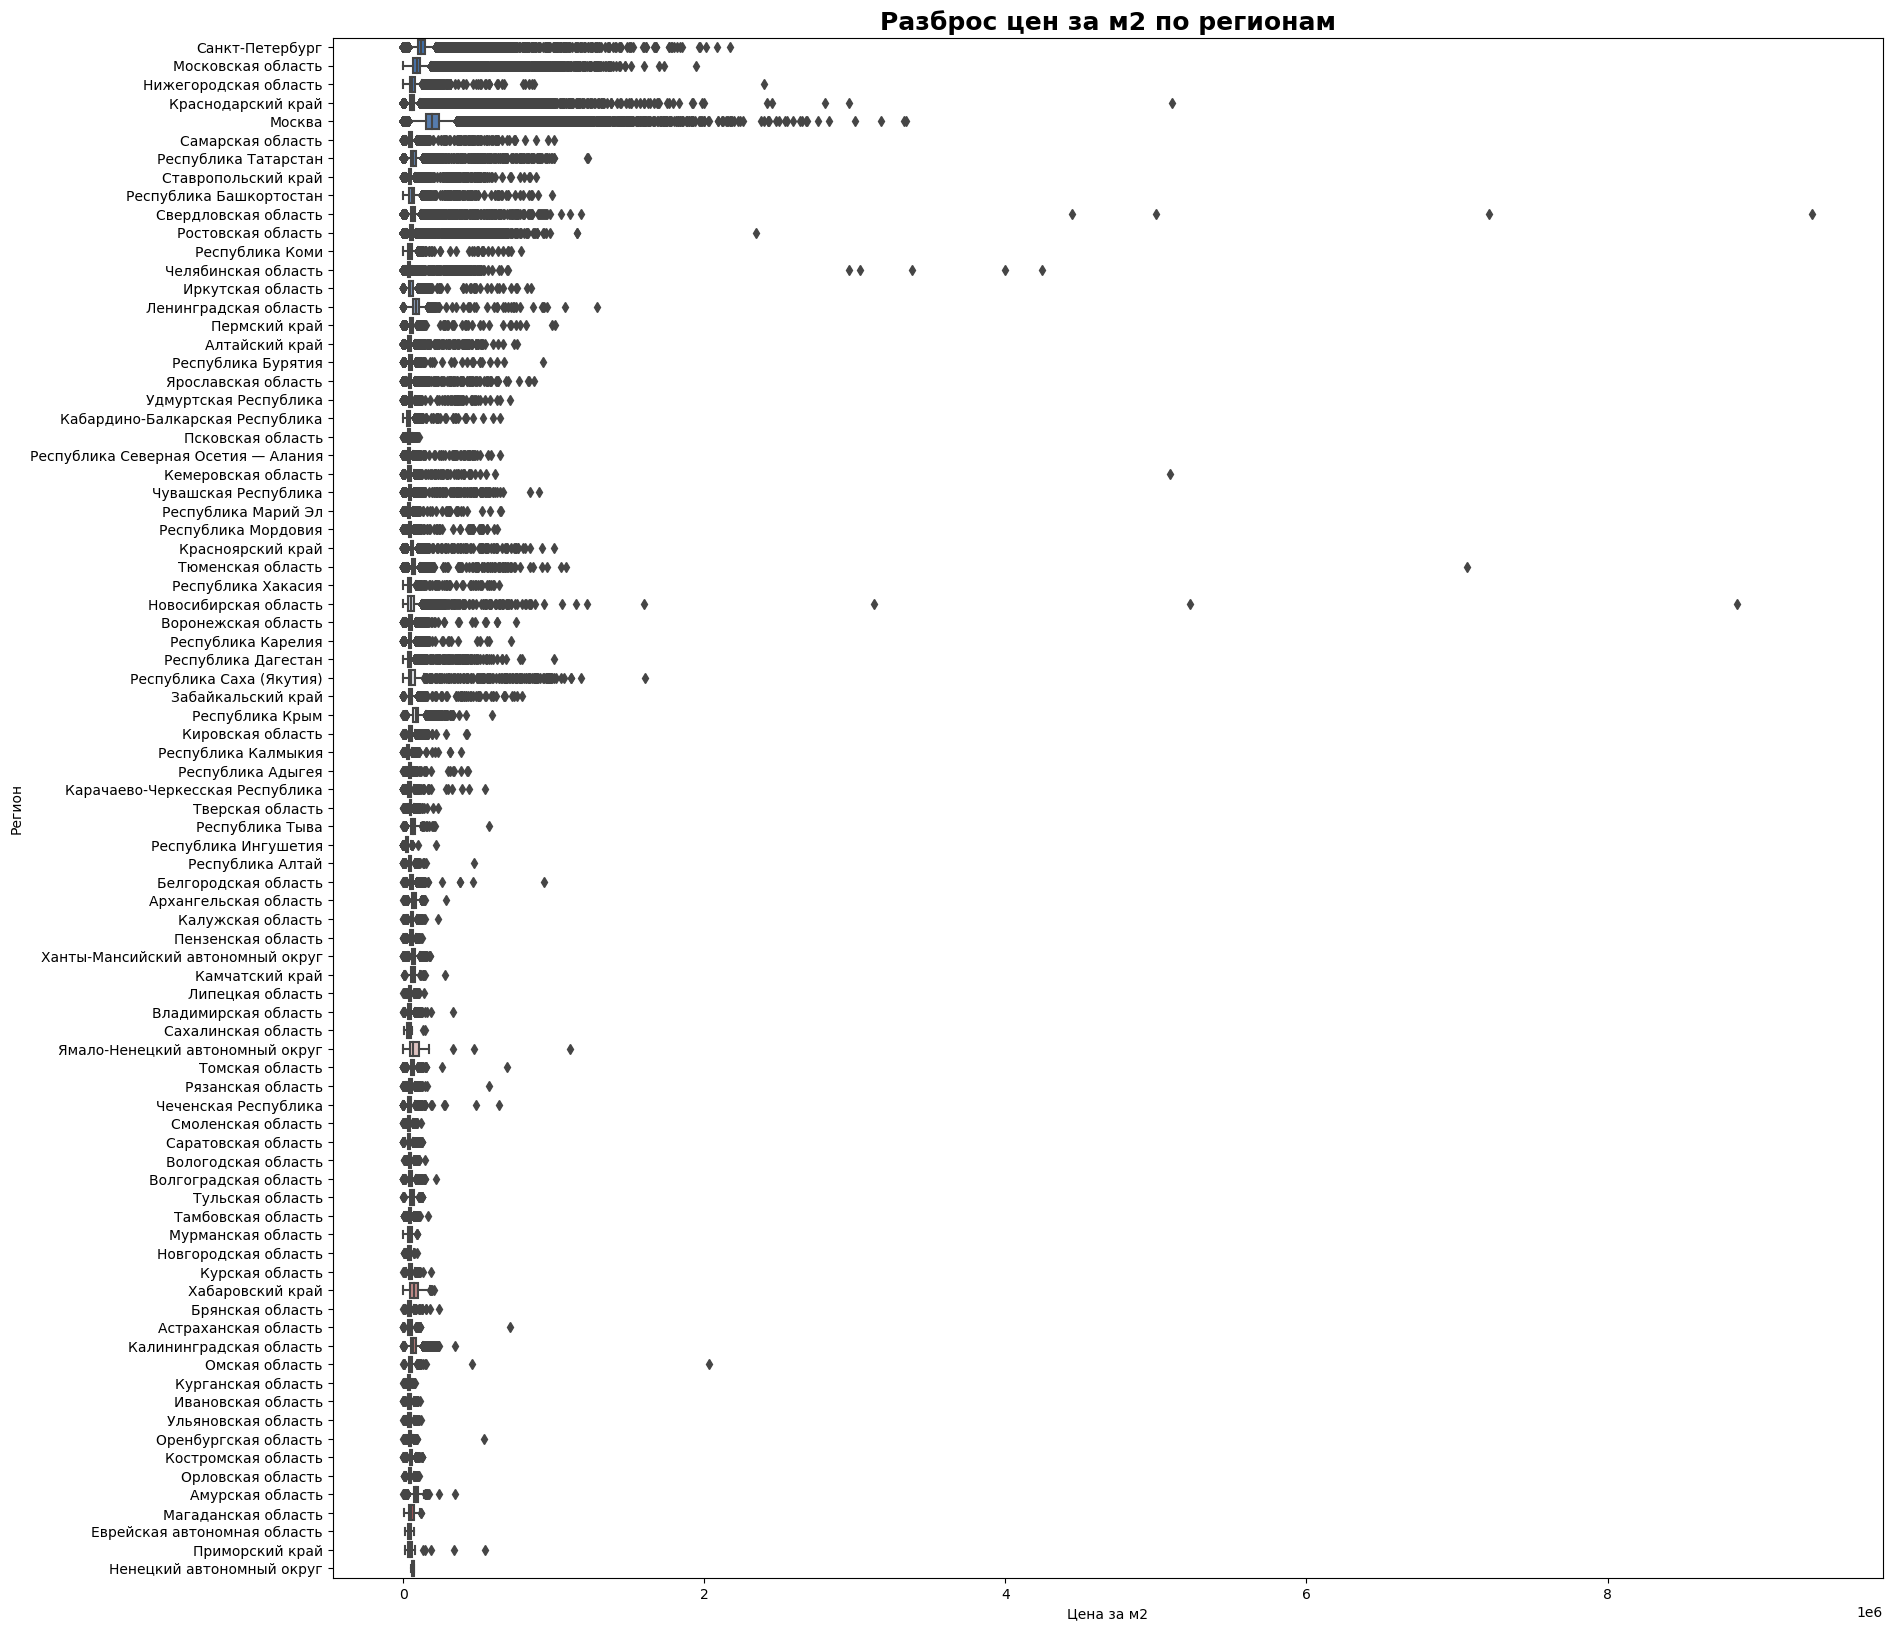

In [ ]:
#Посмотрим как распределяется цена за квадратный метр по регионам с помощью боксплотов
reg_price_m2 = df[['price_m2','reg_name']]

plt.figure(figsize=(20, 20))
sns.boxplot(data=reg_price_m2, y='reg_name', x='price_m2', palette="vlag").set(xlabel='Цена за м2', ylabel='Регион')
plt.title('Разброс цен за м2 по регионам', fontsize=18, fontweight="bold")
plt.show()

Как и предполагалось, цены в регионах сильно отличаются. На фоне других городов Москва сильно выделяется. Также появились выбросы, свидетельствующие  о том, что площадь квартиры мала, в то время как цена за нее высокая. Возможно это связано с ремонтом, типом дома, местоположением и прочими факторами, некоторые из которых мы рассмотрим позже.

In [ ]:
#Определим среднюю цену за квадратный метр по регионам
price_by_reg = df.pivot_table(index='reg_name',
                              aggfunc='mean',
                              values='price_m2').reset_index()
price_by_reg

,reg_name,price_m2
0,Алтайский край,44401.364830
1,Амурская область,85062.766343
2,Архангельская область,72409.089249
3,Астраханская область,47003.306723
4,Белгородская область,55622.550198
...,...,...
78,Челябинская область,38598.323394
79,Чеченская Республика,42598.037873
80,Чувашская Республика,44879.819302
81,Ямало-Ненецкий автономный округ,77793.094663


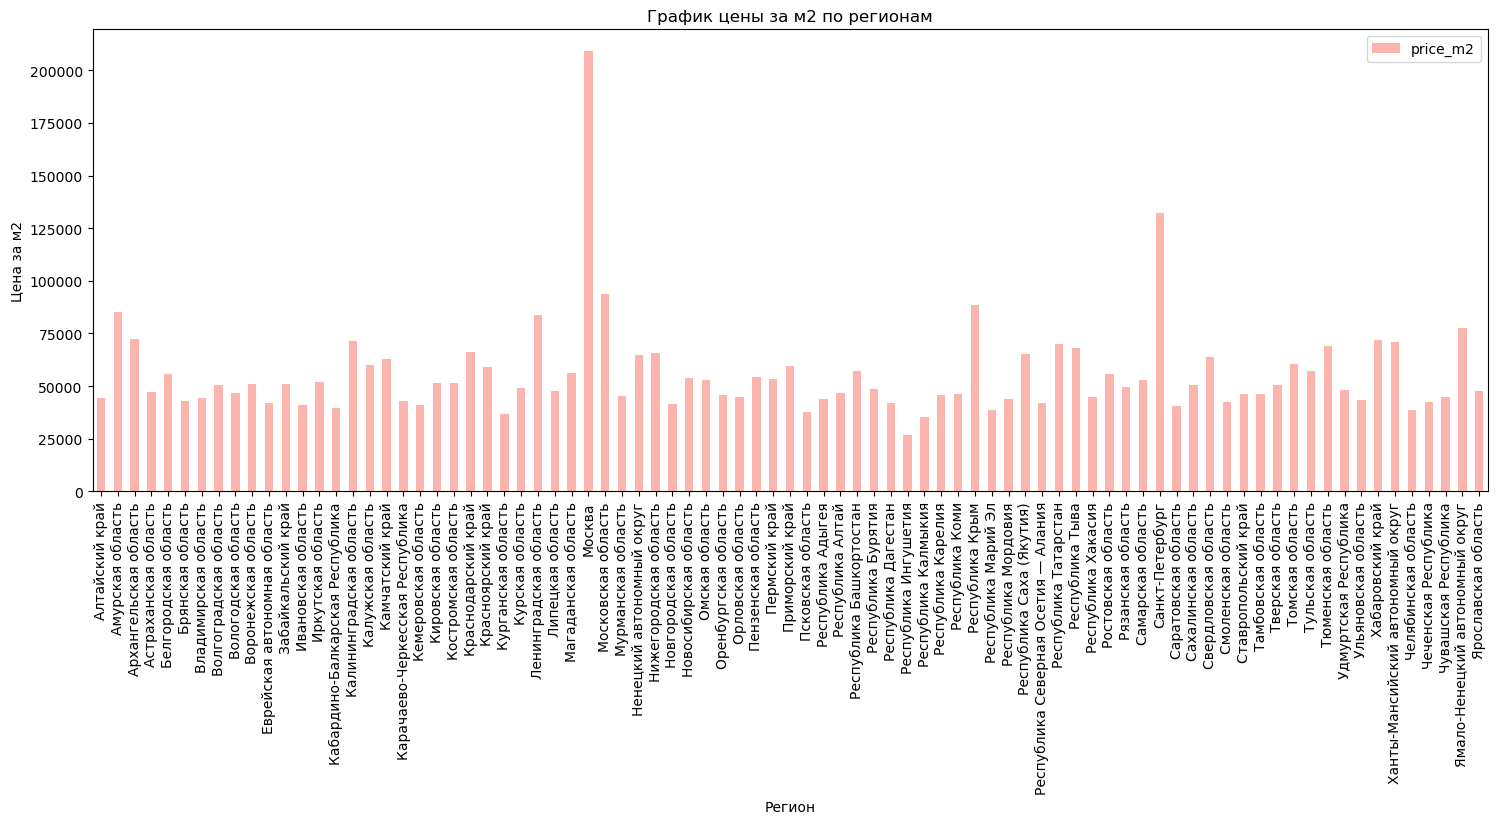

In [ ]:
#Посмотрим на графике
price_by_reg.plot(kind = 'bar',
                  figsize=(18, 6),
                  y='price_m2', 
                  x='reg_name', 
                  title='График цены за м2 по регионам', 
                  ylabel='Цена за м2', 
                  xlabel='Регион')
plt.show()

In [ ]:
#Выделим Топ-5 регионов с наиболее высокой ценой за м2
price_by_reg.sort_values(by='price_m2', ascending=False).head(5)

,reg_name,price_m2
29,Москва,209002.406795
63,Санкт-Петербург,132162.570110
30,Московская область,93775.357495
52,Республика Крым,88358.153559
1,Амурская область,85062.766343


In [ ]:
#Выделим Топ-5 регионов с наиболее низкой ценой за м2
price_by_reg.sort_values(by='price_m2', ascending=False).tail(5)

,reg_name,price_m2
53,Республика Марий Эл,38423.614513
42,Псковская область,37733.307512
24,Курганская область,36663.030050
49,Республика Калмыкия,35485.346431
48,Республика Ингушетия,26779.667746


### building_type

**Тип дома:** <br>
0 - Другое <br>
1 - Панельный <br>
2 - Кирпично-монолитный <br>
3 - Кирпичный <br>
4 - Блочный <br>
5 - Деревянный

In [ ]:
#Определим среднюю цену за квадратный метр по типу дома
price_by_building_mean = df.pivot_table(index='building_type',
                                   aggfunc='mean',
                                   values='price_m2').reset_index()
price_by_building_mean.sort_values(by='price_m2', ascending=False)

,building_type,price_m2
2,2,115491.765768
0,0,82655.707827
3,3,70723.488206
4,4,70241.646514
1,1,67434.178747
5,5,41627.079508


Самым дорогим типом дома по цене за квадратный метр по всей России является кирпично-монолитный. Самым дешевым - деревянный. Наверняка это связано со стоимостью, качеством и долговечностью материалов.

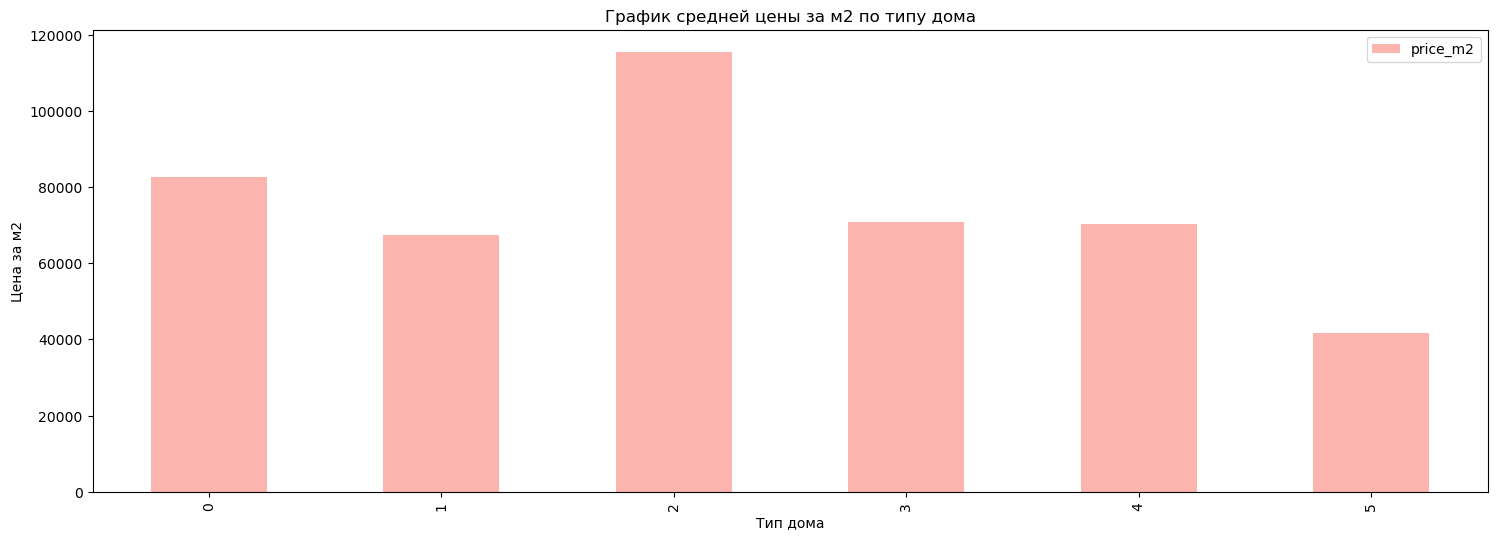

In [ ]:
#Построим график 
price_by_building_mean.plot(kind = 'bar',
                            figsize=(18, 6),
                            y='price_m2', 
                            x='building_type', 
                            title='График средней цены за м2 по типу дома', 
                            ylabel='Цена за м2', 
                            xlabel='Тип дома')
plt.show()

In [ ]:
#Определим медианную цену за квадратный метр по типу дома
price_by_building_median = df.pivot_table(index='building_type',
                                   aggfunc='median',
                                   values='price_m2').reset_index()
price_by_building_median.sort_values(by='price_m2', ascending=False)

,building_type,price_m2
2,2,92933.8
0,0,71816.7
3,3,58333.3
4,4,55857.1
1,1,52439.0
5,5,27444.3


Медианная цена значительно меньше средней. Она больше описывает ситуацию в регионах. Тем не менее, результаты остались такими же, как и при сравнении средней цены. 

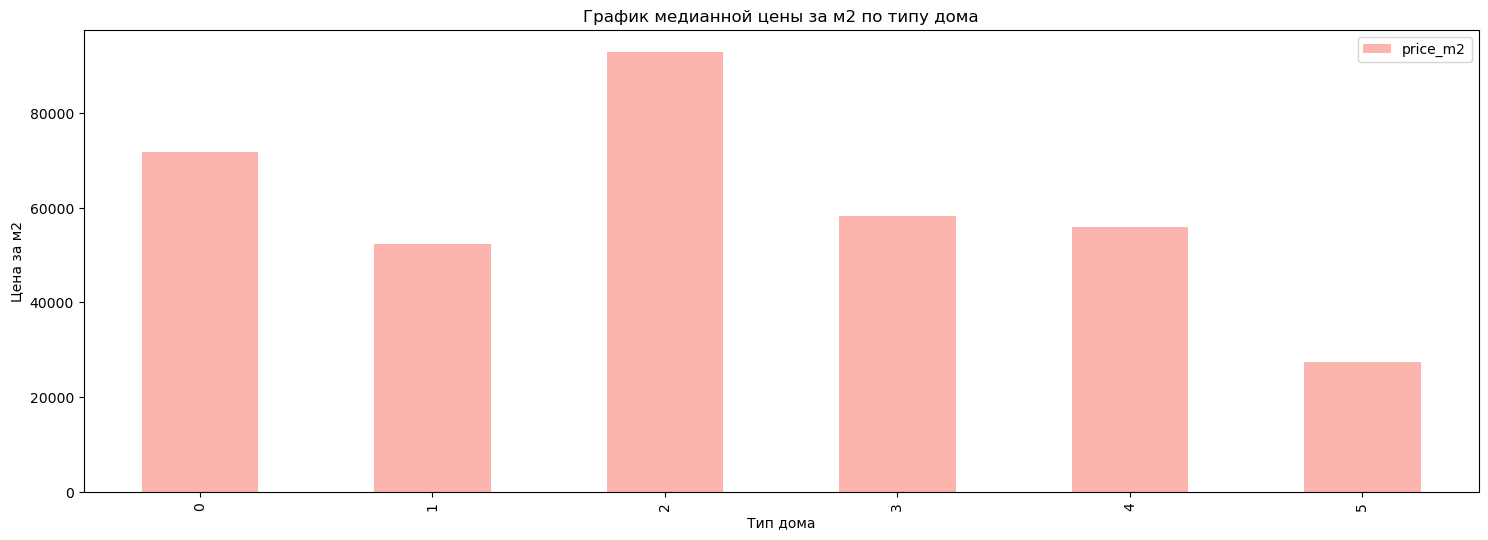

In [ ]:
#Построим график
price_by_building_median.plot(kind = 'bar',
                              figsize=(18, 6),
                              y='price_m2', 
                              x='building_type', 
                              title='График медианной цены за м2 по типу дома', 
                              ylabel='Цена за м2', 
                              xlabel='Тип дома')
plt.show()

Сравнив два графика со средней и медианной ценой, можно сделать вывод о том, что более существенные различия между ценой по типу дома наблюдаются по медианной цене (то есть в регионах)

### level

In [ ]:
#Определим среднюю цену за квадратный метр по каждому этажу дома. Выделим топ-5 по наибольшей цене
price_by_level_mean = df.pivot_table(index='level',
                                   aggfunc='mean',
                                   values='price_m2').reset_index()
price_by_level_mean.sort_values(by='price_m2', ascending=False).head(5)

,level,price_m2
34,35,246321.478358
35,36,230989.731081
37,38,230142.305000
38,39,222803.307407
33,34,215446.900000


In [ ]:
#Выделим топ-5 по наименьшей цене
price_by_level_mean = df.pivot_table(index='level',
                                   aggfunc='mean',
                                   values='price_m2').reset_index()
price_by_level_mean.sort_values(by='price_m2', ascending=False).tail(5)

,level,price_m2
3,4,74947.412658
2,3,74732.438266
4,5,73061.841263
1,2,72789.803710
0,1,62193.575010


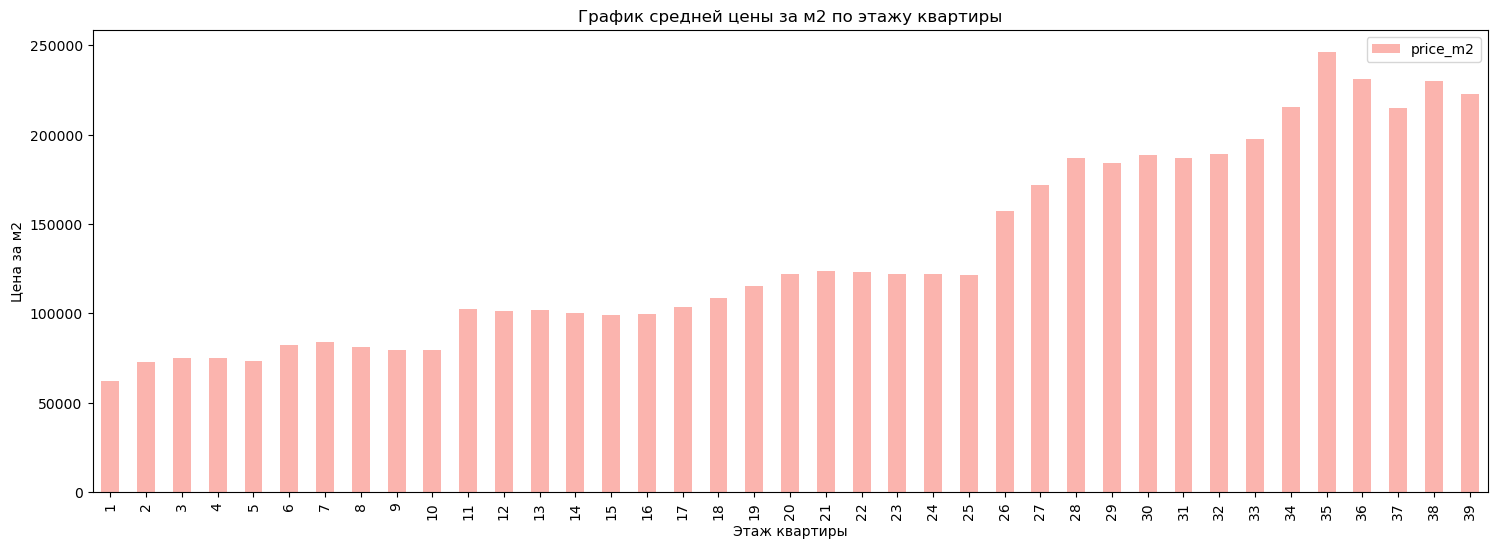

In [ ]:
#Построим график
price_by_level_mean.plot(kind = 'bar',
                         figsize=(18, 6),
                         y='price_m2', 
                         x='level', 
                         title='График средней цены за м2 по этажу квартиры', 
                         ylabel='Цена за м2', 
                         xlabel='Этаж квартиры')
plt.show()

In [ ]:
#Определим медианную цену за квадратный метр по типу дома. Выделим топ-5 по наибольшей цене
price_by_level_meadian = df.pivot_table(index='level',
                                        aggfunc='median',
                                        values='price_m2').reset_index()
price_by_level_meadian.sort_values(by='price_m2', ascending=False).head(5)

,level,price_m2
34,35,254799.2
37,38,235147.7
33,34,211623.2
35,36,208419.5
36,37,207204.5


In [ ]:
#Выделим топ-5 по наименьшей цене
price_by_level_meadian = df.pivot_table(index='level',
                                       aggfunc='median',
                                       values='price_m2').reset_index()
price_by_level_meadian.sort_values(by='price_m2', ascending=False).tail(5)

,level,price_m2
3,4,58823.5
2,3,58653.8
4,5,57407.4
1,2,56875.0
0,1,49369.7


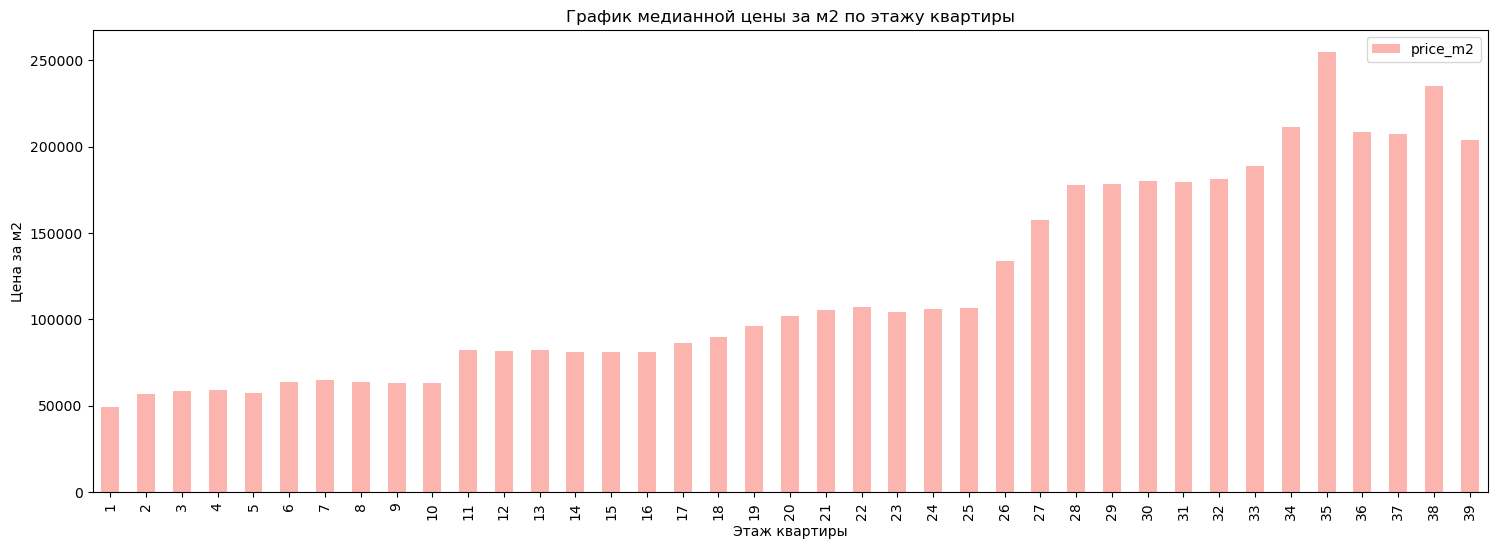

In [ ]:
#Построим график
price_by_level_meadian.plot(kind = 'bar',
                            figsize=(18, 6),
                            y='price_m2', 
                            x='level', 
                            title='График медианной цены за м2 по этажу квартиры', 
                            ylabel='Цена за м2', 
                            xlabel='Этаж квартиры')
plt.show()

Судя по графикам средней и медианной цены можно выстроить следующую закономерность: при увеличении этажа дома, стоимость квадратного метра квартиры увеличивается. Однако она снова падает на последних этажах. Возможно, спрос на квартиры на первом и последнем этаже меньше, нежели спрос на другие этажи

### levels

In [ ]:
#Определим среднюю цену за квадратный метр по этажности дома. Выделим топ-5 по наибольшей цене
price_by_levels_mean = df.pivot_table(index='levels',
                                      aggfunc='mean',
                                      values='price_m2').reset_index()
price_by_levels_mean.sort_values(by='price_m2', ascending=False).head(5)

,levels,price_m2
35,36,269825.890389
37,38,243400.094563
38,39,237919.924066
27,28,187856.865853
28,29,182394.105310


In [ ]:
#Выделим топ-5 по наименьшей цене
price_by_levels_mean = df.pivot_table(index='levels',
                                   aggfunc='mean',
                                   values='price_m2').reset_index()
price_by_levels_mean.sort_values(by='price_m2', ascending=False).tail(5)

,levels,price_m2
4,5,61144.228317
2,3,54702.102107
9,10,52997.614760
1,2,37806.685620
0,1,37337.466208


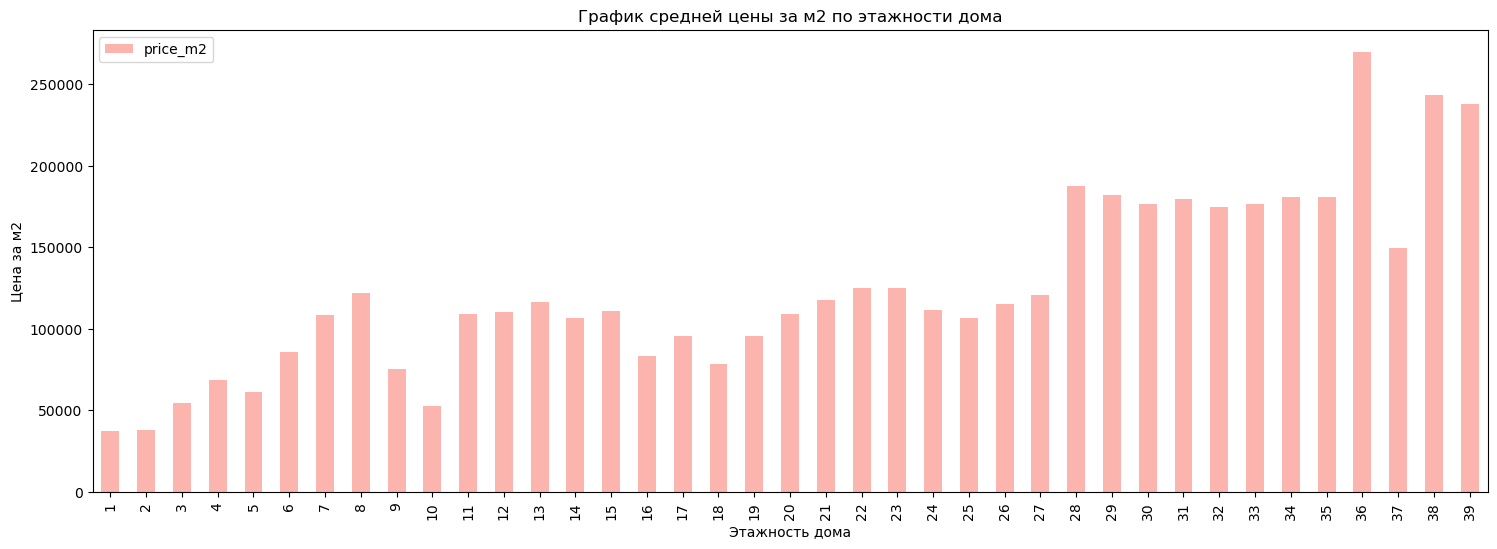

In [ ]:
#Построим график
price_by_levels_mean.plot(kind = 'bar',
                         figsize=(18, 6),
                         y='price_m2', 
                         x='levels', 
                         title='График средней цены за м2 по этажности дома', 
                         ylabel='Цена за м2', 
                         xlabel='Этажность дома')
plt.show()

In [ ]:
#Определим медианную цену за квадратный метр по этажности дома. Выделим топ-5 по наибольшей цене
price_by_levels_median = df.pivot_table(index='levels',
                                       aggfunc='median',
                                       values='price_m2').reset_index()
price_by_levels_median.sort_values(by='price_m2', ascending=False).head(5)

,levels,price_m2
35,36,265322.6
38,39,223750.0
37,38,214242.0
27,28,183750.0
28,29,182561.0


In [ ]:
#Выделим топ-5 по наименьшей цене
price_by_levels_median = df.pivot_table(index='levels',
                                   aggfunc='median',
                                   values='price_m2').reset_index()
price_by_levels_median.sort_values(by='price_m2', ascending=False).tail(5)

,levels,price_m2
4,5,51562.5
2,3,47058.8
9,10,42338.9
1,2,33750.0
0,1,30669.1


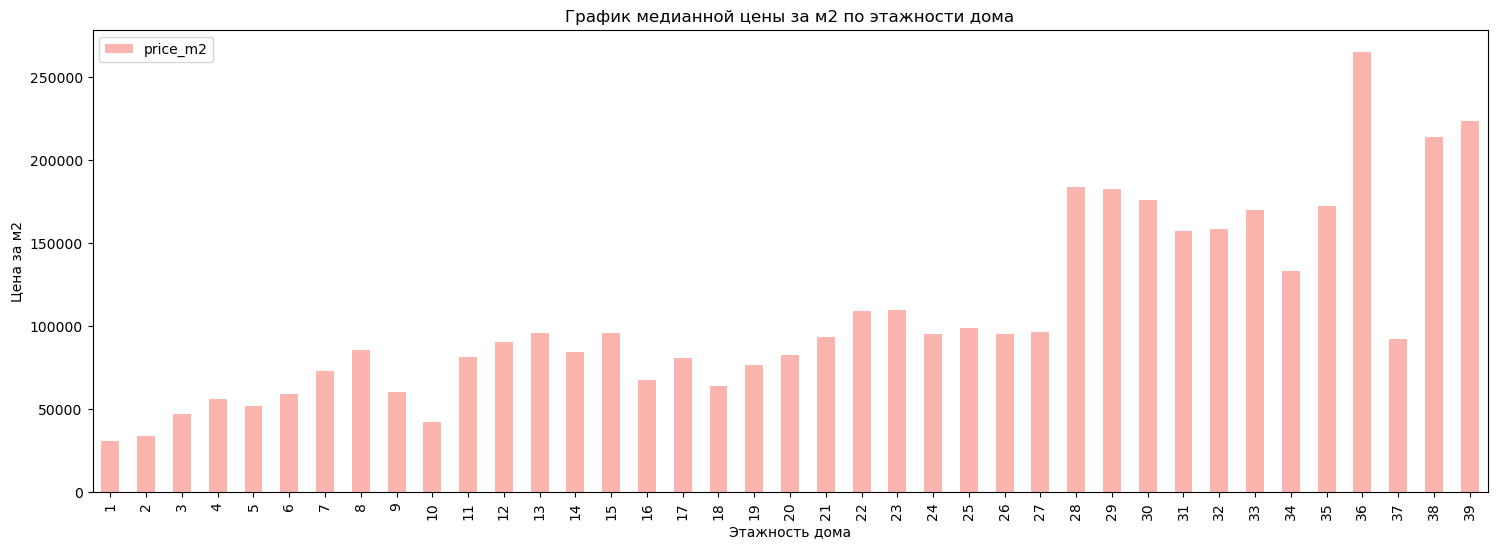

In [ ]:
#Построим график
price_by_levels_median.plot(kind = 'bar',
                         figsize=(18, 6),
                         y='price_m2', 
                         x='levels', 
                         title='График медианной цены за м2 по этажности дома', 
                         ylabel='Цена за м2', 
                         xlabel='Этажность дома')
plt.show()

Судя по графикам средней и медианной цены, существует общая тенденция к увеличению стоимости м2 в зависимости от количества этажей в доме. Однако, есть промежутки, на которых стоимость снижается, либо остается примерно одинаковой. Самым дешевым является 10 этаж. Возможно это связано с тем, что в большинстве регионов стоят дома не выше 10 этажей, где 10 этаж является последним. А как мы выяснили из прошлого пункта, последний этаж является одним из самых дешевых по цене за м2

### rooms

In [ ]:
#Определим среднюю цену за квадратный метр по числу комнат
price_by_rooms_mean = df.pivot_table(index='rooms',
                                     aggfunc='mean',
                                     values='price_m2').reset_index()
price_by_rooms_mean.sort_values(by='price_m2', ascending=False)

,rooms,price_m2
10,10,394029.900000
6,6,164253.904453
8,8,154089.883607
7,7,147753.232851
5,5,119975.069430
9,9,103288.127119
4,4,90294.247144
0,-1,87362.568095
1,1,79098.387005
2,2,78824.343523


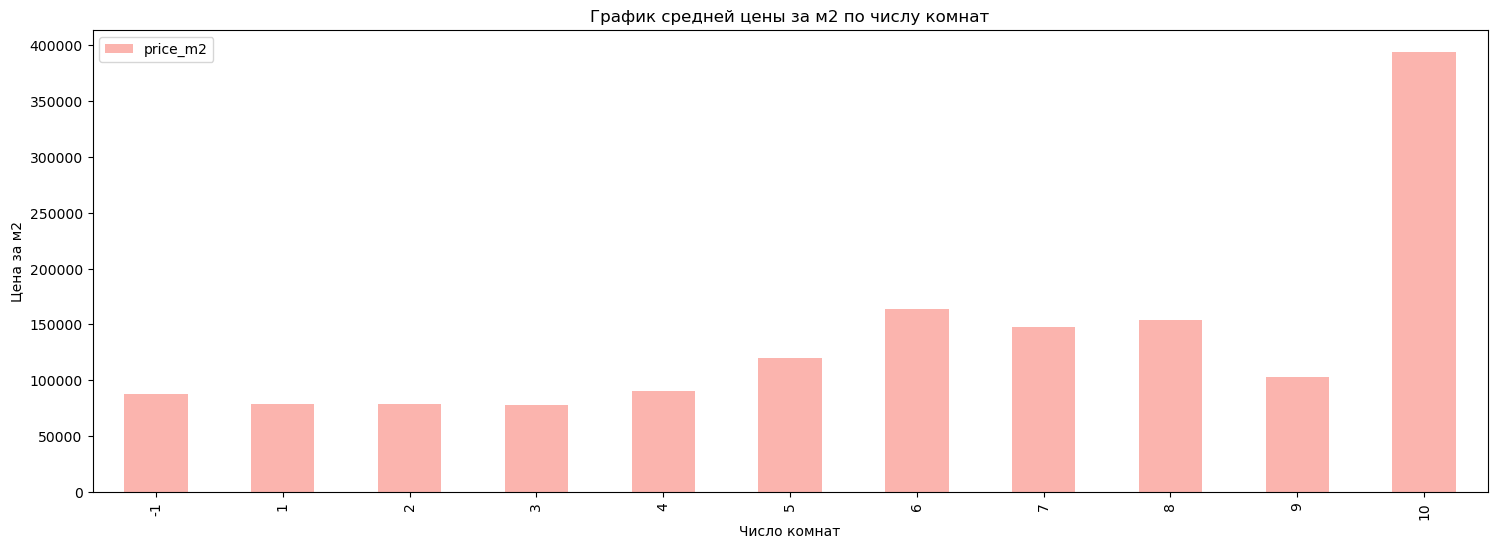

In [ ]:
#Построим график
price_by_rooms_mean.plot(kind = 'bar',
                         figsize=(18, 6),
                         y='price_m2', 
                         x='rooms', 
                         title='График средней цены за м2 по числу комнат', 
                         ylabel='Цена за м2', 
                         xlabel='Число комнат')
plt.show()

In [ ]:
#Определим медианную цену за квадратный метр по числу комнат
price_by_rooms_median = df.pivot_table(index='rooms',
                                       aggfunc='median',
                                       values='price_m2').reset_index()
price_by_rooms_median.sort_values(by='price_m2', ascending=False)

,rooms,price_m2
10,10,394029.90
6,6,103437.45
8,8,99337.70
7,7,98867.90
9,9,84151.50
5,5,70000.00
0,-1,65263.20
1,1,63750.00
2,2,62000.00
3,3,59000.00


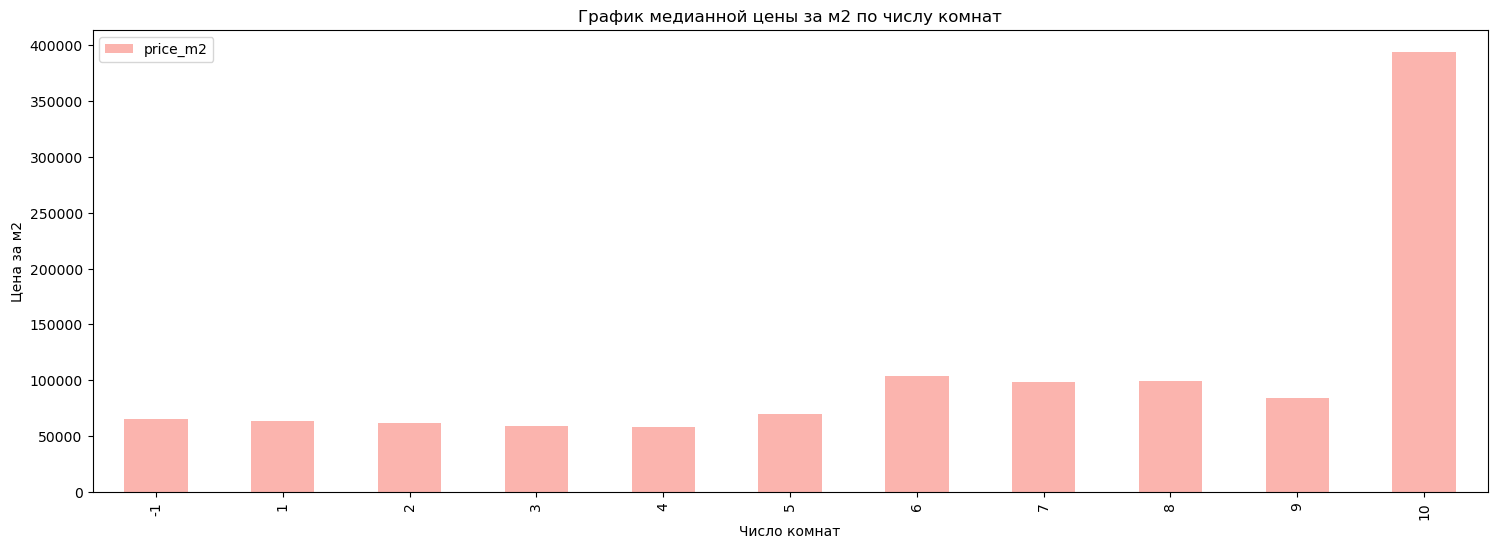

In [ ]:
#Построим график
price_by_rooms_median.plot(kind = 'bar',
                         figsize=(18, 6),
                         y='price_m2', 
                         x='rooms', 
                         title='График медианной цены за м2 по числу комнат', 
                         ylabel='Цена за м2', 
                         xlabel='Число комнат')
plt.show()

Судя по полученным данным, исследуя медианную и среднюю цену, можно получить разные закономерности по ценообразованию по числу комнат. В случае со средней ценой самой дешевой по стоимости за квадратный метр является трехкомнатная квартира, в то время как по медианной цене - четырехкомнатная. Видимо спрос на четырехкомнатные квартиры в регионах не такой высокий, как в городах-миллионниках 

### object_type

**Тип рынка**: <br>
1 - Вторичный рынок <br>
11 - Первичный рынок <br>

In [ ]:
#Определим среднюю цену за квадратный метр по типу рынка
price_by_object_mean = df.pivot_table(index='object_type',
                                      aggfunc='mean',
                                      values='price_m2').reset_index()
price_by_object_mean.sort_values(by='price_m2', ascending=False)

,object_type,price_m2
1,11,87520.332909
0,1,76675.688582


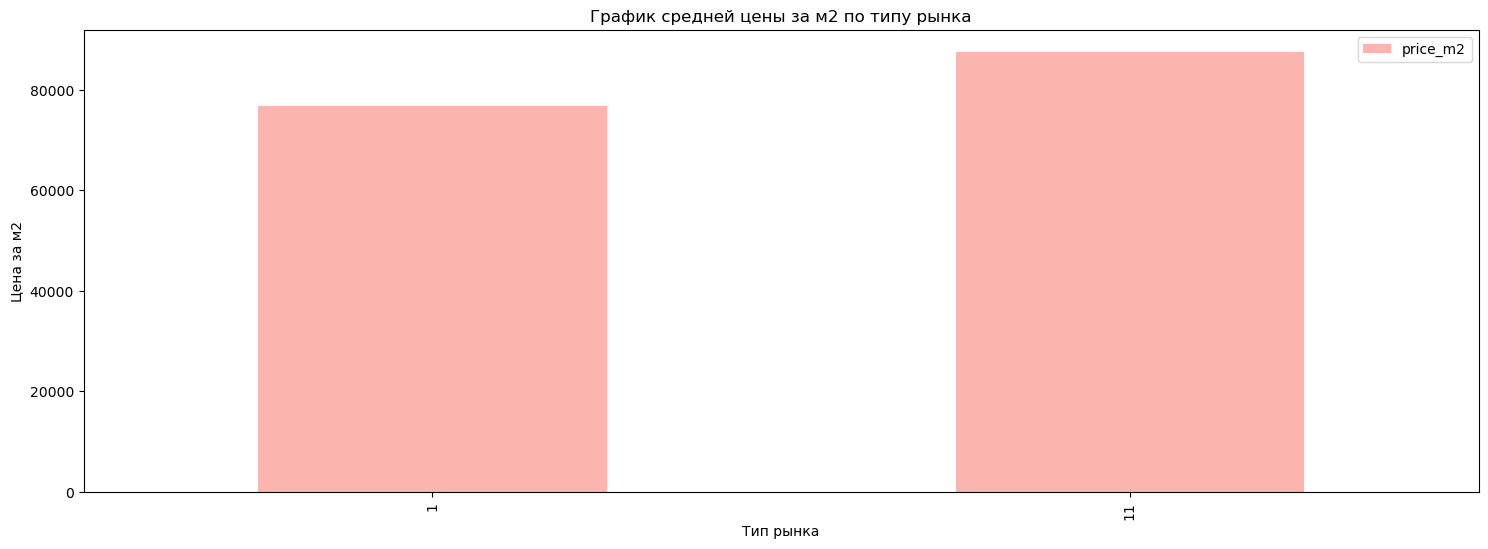

In [ ]:
#Построим график
price_by_object_mean.plot(kind = 'bar',
                         figsize=(18, 6),
                         y='price_m2', 
                         x='object_type', 
                         title='График средней цены за м2 по типу рынка', 
                         ylabel='Цена за м2', 
                         xlabel='Тип рынка')
plt.show()

In [ ]:
#Определим медианную цену за квадратный метр по типу рынка
price_by_object_median = df.pivot_table(index='object_type',
                                      aggfunc='median',
                                      values='price_m2').reset_index()
price_by_object_median.sort_values(by='price_m2', ascending=False)

,object_type,price_m2
1,11,66666.7
0,1,60773.5


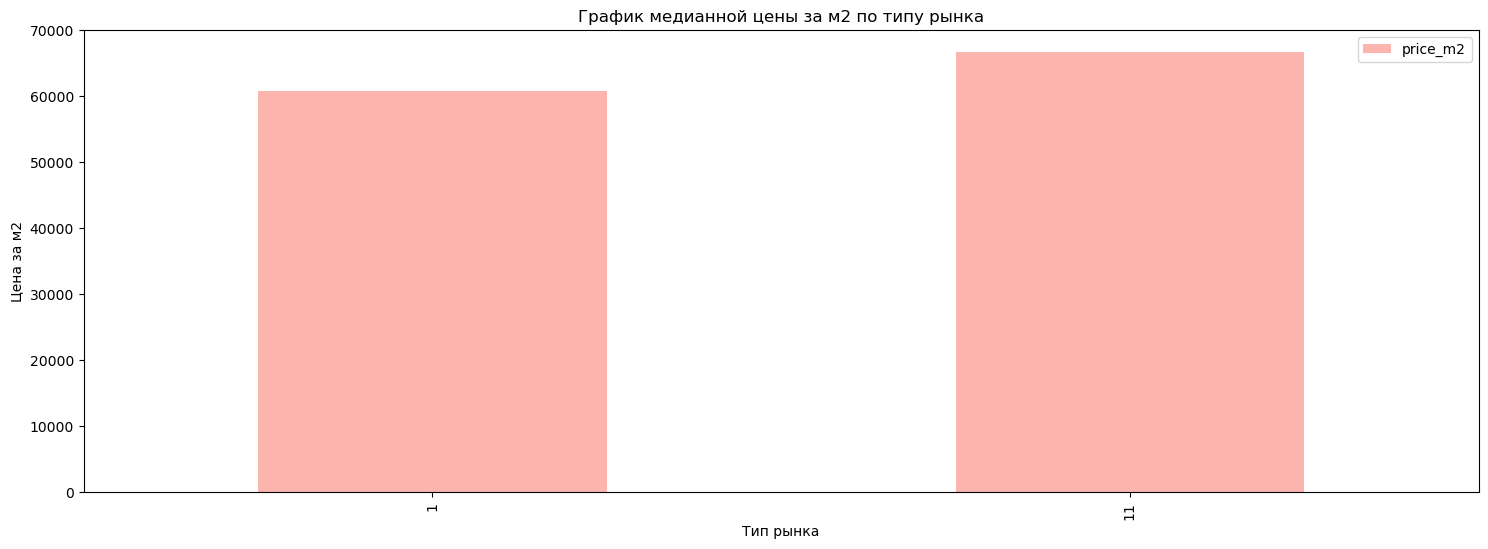

In [ ]:
#Построим график
price_by_object_median.plot(kind = 'bar',
                            figsize=(18, 6),
                            y='price_m2', 
                            x='object_type', 
                            title='График медианной цены за м2 по типу рынка', 
                            ylabel='Цена за м2', 
                            xlabel='Тип рынка')
plt.show()

В обоих случаях первичное жилье, т.е новостройки стоят дороже за квадратный метр, нежели вторичное жилье

<div class="alert alert-block alert-success">
<b>Вывод:</b><br>
    `reg_name`: В крупных городах стоимость одного квадратного метра объекта недвижимости дороже, нежели в маленьких. Наиболее дорогими регионами по стоимости одного квадратного метра можно выделить Москву (209 028 руб./м2) и Санкт-Петербург (132 175 руб./м2). Самым дешевым регионом является Республика Ингушетия (26 780 руб./м2). <br>
    `building_type`: Самым дорогим типом дома по цене за квадратный метр по всей России является кирпично-монолитный. Самым дешевым - деревянный. Наверняка это связано со стоимостью, качеством и долговечностью материалов. Медианная цена значительно меньше средней. Она больше описывает ситуацию в регионах. Тем не менее, результаты остались такими же, как и при сравнении средней цены. <br>
    `level`: При увеличении этажа дома, стоимость квадратного метра квартиры увеличивается. Однако она снова падает на последних этажах. Возможно, спрос на квартиры на первом и последнем этаже меньше, нежели спрос на другие этажи.<br>
    `levels`: Существует общая тенденция к увеличению стоимости м2 в зависимости от количества этажей в доме. Однако, есть промежутки, на которых стоимость снижается, либо остается примерно одинаковой. Самым дешевым является 10 этаж. Возможно это связано с тем, что в большинстве регионов стоят дома не выше 10 этажей, где 10 этаж является последним. А как мы выяснили из прошлого пункта, последний этаж является одним из самых дешевых по цене за м2. <br>
    `rooms`:  В случае со средней ценой за квадратный метр по числу комнат самым дешевым вариантом является 3-хкомнатная квартира. В случае с медианной ценой - 4-хкомнатная квартира. Такая ситуация может быть связана с меньшим спросом на 4-хкомнатные квартиры в регионах, чем в крупных городах. В обоих сулчаях самой дорогой является 10-тикомнатная квартира.<br>
    `object_type`: Стоимость квадратного метра на первичном рынке дороже, чем на вторичном. <br>

[Вернуться к навигации](#9th)

<div style="background-color: mistyrose; padding: 5px; border-radius: 100px;">
    <a class="anchor" id="5th"></a> 
    <div align = "center">
    <h1 style="color: darkred;">  5. Когда выгодно покупать/продавать объект недвижимости?

In [ ]:
df.head(1)

,price,price_m2,date,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,2018-02-19,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


**Для ответа на вопрос "Когда выгодно покупать/продавать объект недвижимости?" нужно рассмотреть:** <br>
    1. Динамику цен за квадратный метр по месяцам. (При этом нужно учитывать, что в регионах стоимость квадратного метра меньше)  <br>
    2. Динамику цен на первичном и вторичном рынке. <br>
    3. Число проданных квартир по месяцам.  <br>

### Динамика цен за квадратный метр по месяцам

In [ ]:
#Создадим общий отчет о динамике цен за квадратный метр по месяцам¶
price_m2_dynamics_mean = df.pivot_table(index='date',
                                   aggfunc='mean',
                                   values='price_m2').reset_index()
price_m2_dynamics_mean

,date,price_m2
0,2018-02-19,73244.600000
1,2018-02-27,125180.900000
2,2018-02-28,60606.100000
3,2018-03-01,69758.750000
4,2018-03-02,103125.000000
...,...,...
1070,2021-04-27,102810.795072
1071,2021-04-28,106283.833609
1072,2021-04-29,103555.543125
1073,2021-04-30,107770.212146


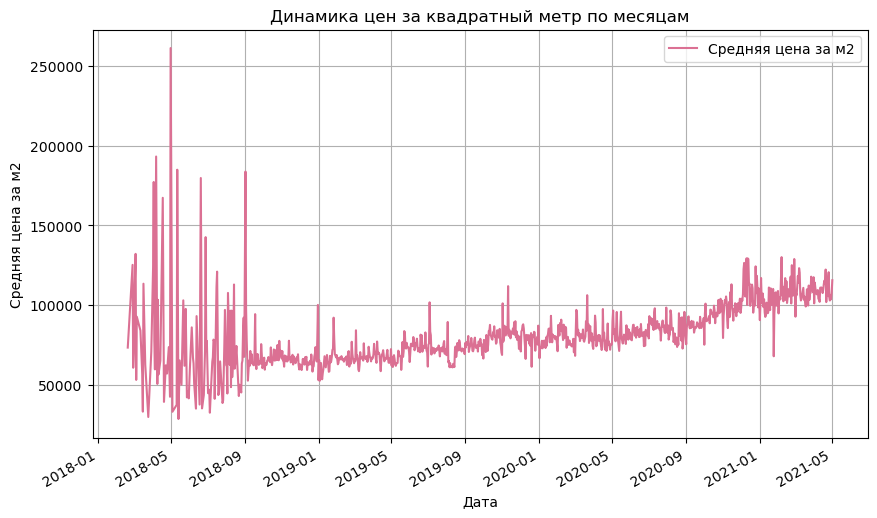

In [ ]:
#Визуализируем
price_m2_dynamics_mean.plot(grid=True, title='Динамика цен за квадратный метр по месяцам', ylabel='Средняя цена за м2', xlabel='Дата', figsize=(10,6), x='date', y='price_m2', label='Средняя цена за м2',  color='PaleVioletRed')
plt.show()

Видим, что в 2018 году были очень резкие скачки по ценам, возможно в этот год был сильный экономический кризис. Если смотреть на динамику с 2019 года, то видим тенденцию к увеличению стоимости квадратного метра

In [ ]:
#Посмотрим, что было с медианными ценами
price_m2_dynamics_median = df.pivot_table(index='date',
                                   aggfunc='median',
                                   values='price_m2').reset_index()
price_m2_dynamics_median

,date,price_m2
0,2018-02-19,73244.60
1,2018-02-27,125180.90
2,2018-02-28,60606.10
3,2018-03-01,69758.75
4,2018-03-02,103125.00
...,...,...
1070,2021-04-27,81999.60
1071,2021-04-28,82011.25
1072,2021-04-29,82121.60
1073,2021-04-30,84753.05


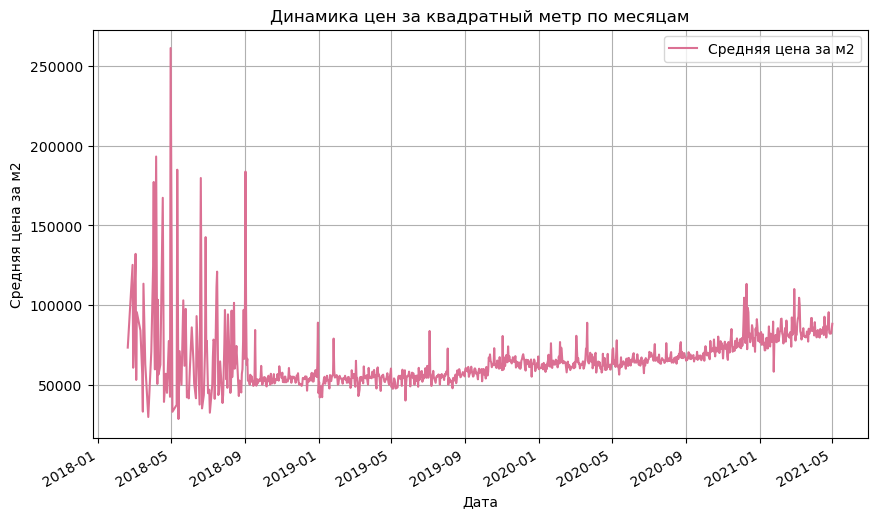

In [ ]:
#Визуализируем
price_m2_dynamics_median.plot(grid=True, title='Динамика цен за квадратный метр по месяцам', ylabel='Средняя цена за м2', xlabel='Дата', figsize=(10,6), x='date', y='price_m2', label='Средняя цена за м2',  color='PaleVioletRed')
plt.show()

Ситуация особо не поменялась, значит в регионах и в крупных городах происходило примерно одинаковое повышение и снижение цен.

**Разделим датасет на 4 периода: 2018 год, 2019 год, 2020 год, 2021 год.** Сравним динамику цен за эти четыре периода, чтобы выявить общую закономерность.

In [ ]:
#Добавим столбец year
year = pd.DatetimeIndex(df['date']).year 
df.insert(loc = 3, column = 'year', value = year)
df

,price,price_m2,date,year,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,2018-02-19,2018,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1
1,8650000,125180.9,2018-02-27,2018,81,Московская область,3,5,24,2,69.1,12.0,1
2,4000000,60606.1,2018-02-28,2018,2871,Нижегородская область,1,5,9,3,66.0,10.0,1
3,1850000,48684.2,2018-03-01,2018,2843,Краснодарский край,4,12,16,2,38.0,5.0,11
4,5450000,90833.3,2018-03-01,2018,81,Московская область,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230540,19739760,211800.0,2021-05-01,2021,3,Москва,1,8,17,4,93.2,13.8,11
5230541,12503160,272400.0,2021-05-01,2021,3,Москва,2,17,32,2,45.9,6.6,11
5230542,8800000,101734.1,2021-05-01,2021,2871,Нижегородская область,2,4,17,3,86.5,11.8,1
5230543,11831910,227100.0,2021-05-01,2021,3,Москва,1,8,33,2,52.1,18.9,11


In [ ]:
#Добавим столбец mounth
month = pd.DatetimeIndex(df['date']).month 
df.insert(loc = 4, column = 'month', value = month)
df.head(1)

,price,price_m2,date,year,month,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,2018-02-19,2018,2,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


In [ ]:
#Для удобства обозначим месяца
dict_mounth = {1: 'january',
               2: 'february',
               3: 'march',
               4: 'april',
               5: 'may',
               6: 'june',
               7: 'july',
               8: 'august',
               9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

In [ ]:
month_name = df['month'].map(dict_mounth)
df.insert(loc = 5, column = 'month_name', value = month_name)
df

,price,price_m2,date,year,month,month_name,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,2018-02-19,2018,2,february,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1
1,8650000,125180.9,2018-02-27,2018,2,february,81,Московская область,3,5,24,2,69.1,12.0,1
2,4000000,60606.1,2018-02-28,2018,2,february,2871,Нижегородская область,1,5,9,3,66.0,10.0,1
3,1850000,48684.2,2018-03-01,2018,3,march,2843,Краснодарский край,4,12,16,2,38.0,5.0,11
4,5450000,90833.3,2018-03-01,2018,3,march,81,Московская область,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230540,19739760,211800.0,2021-05-01,2021,5,may,3,Москва,1,8,17,4,93.2,13.8,11
5230541,12503160,272400.0,2021-05-01,2021,5,may,3,Москва,2,17,32,2,45.9,6.6,11
5230542,8800000,101734.1,2021-05-01,2021,5,may,2871,Нижегородская область,2,4,17,3,86.5,11.8,1
5230543,11831910,227100.0,2021-05-01,2021,5,may,3,Москва,1,8,33,2,52.1,18.9,11


Теперь можем сделать динамику цен за квадратный метр по `2018` году

In [ ]:
year_2018 = df[df['year'] == 2018].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'] #данных по январю нет
year_2018 = year_2018.reindex(month_order)
year_2018

,median
month_name,
january,NaN
february,73244.60
march,70666.70
april,62781.55
may,50000.00
june,65243.90
july,47647.10
august,64423.55
september,55000.00


По `2019` году:

In [ ]:
year_2019 = df[df['year'] == 2019].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
year_2019 = year_2019.reindex(month_order)
year_2019

,median
month_name,
january,53236.1
february,54035.1
march,54687.5
april,55277.8
may,54687.5
june,55769.2
july,55882.4
august,55555.6
september,58333.3


По `2020` году:

In [ ]:
year_2020 = df[df['year'] == 2020].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
year_2020 = year_2020.reindex(month_order)
year_2020

,median
month_name,
january,63475.70
february,62500.00
march,65083.25
april,62096.80
may,63571.40
june,64300.00
july,66666.70
august,66528.10
september,67000.00


По `2021` году:

In [ ]:
year_2021 = df[df['year'] == 2021].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'] #данных дальше мая месяца нет
year_2021 = year_2021.reindex(month_order)
year_2021

,median
month_name,
january,75757.6
february,81777.8
march,82105.3
april,83000.0
may,88181.8
june,NaN
july,NaN
august,NaN
september,NaN


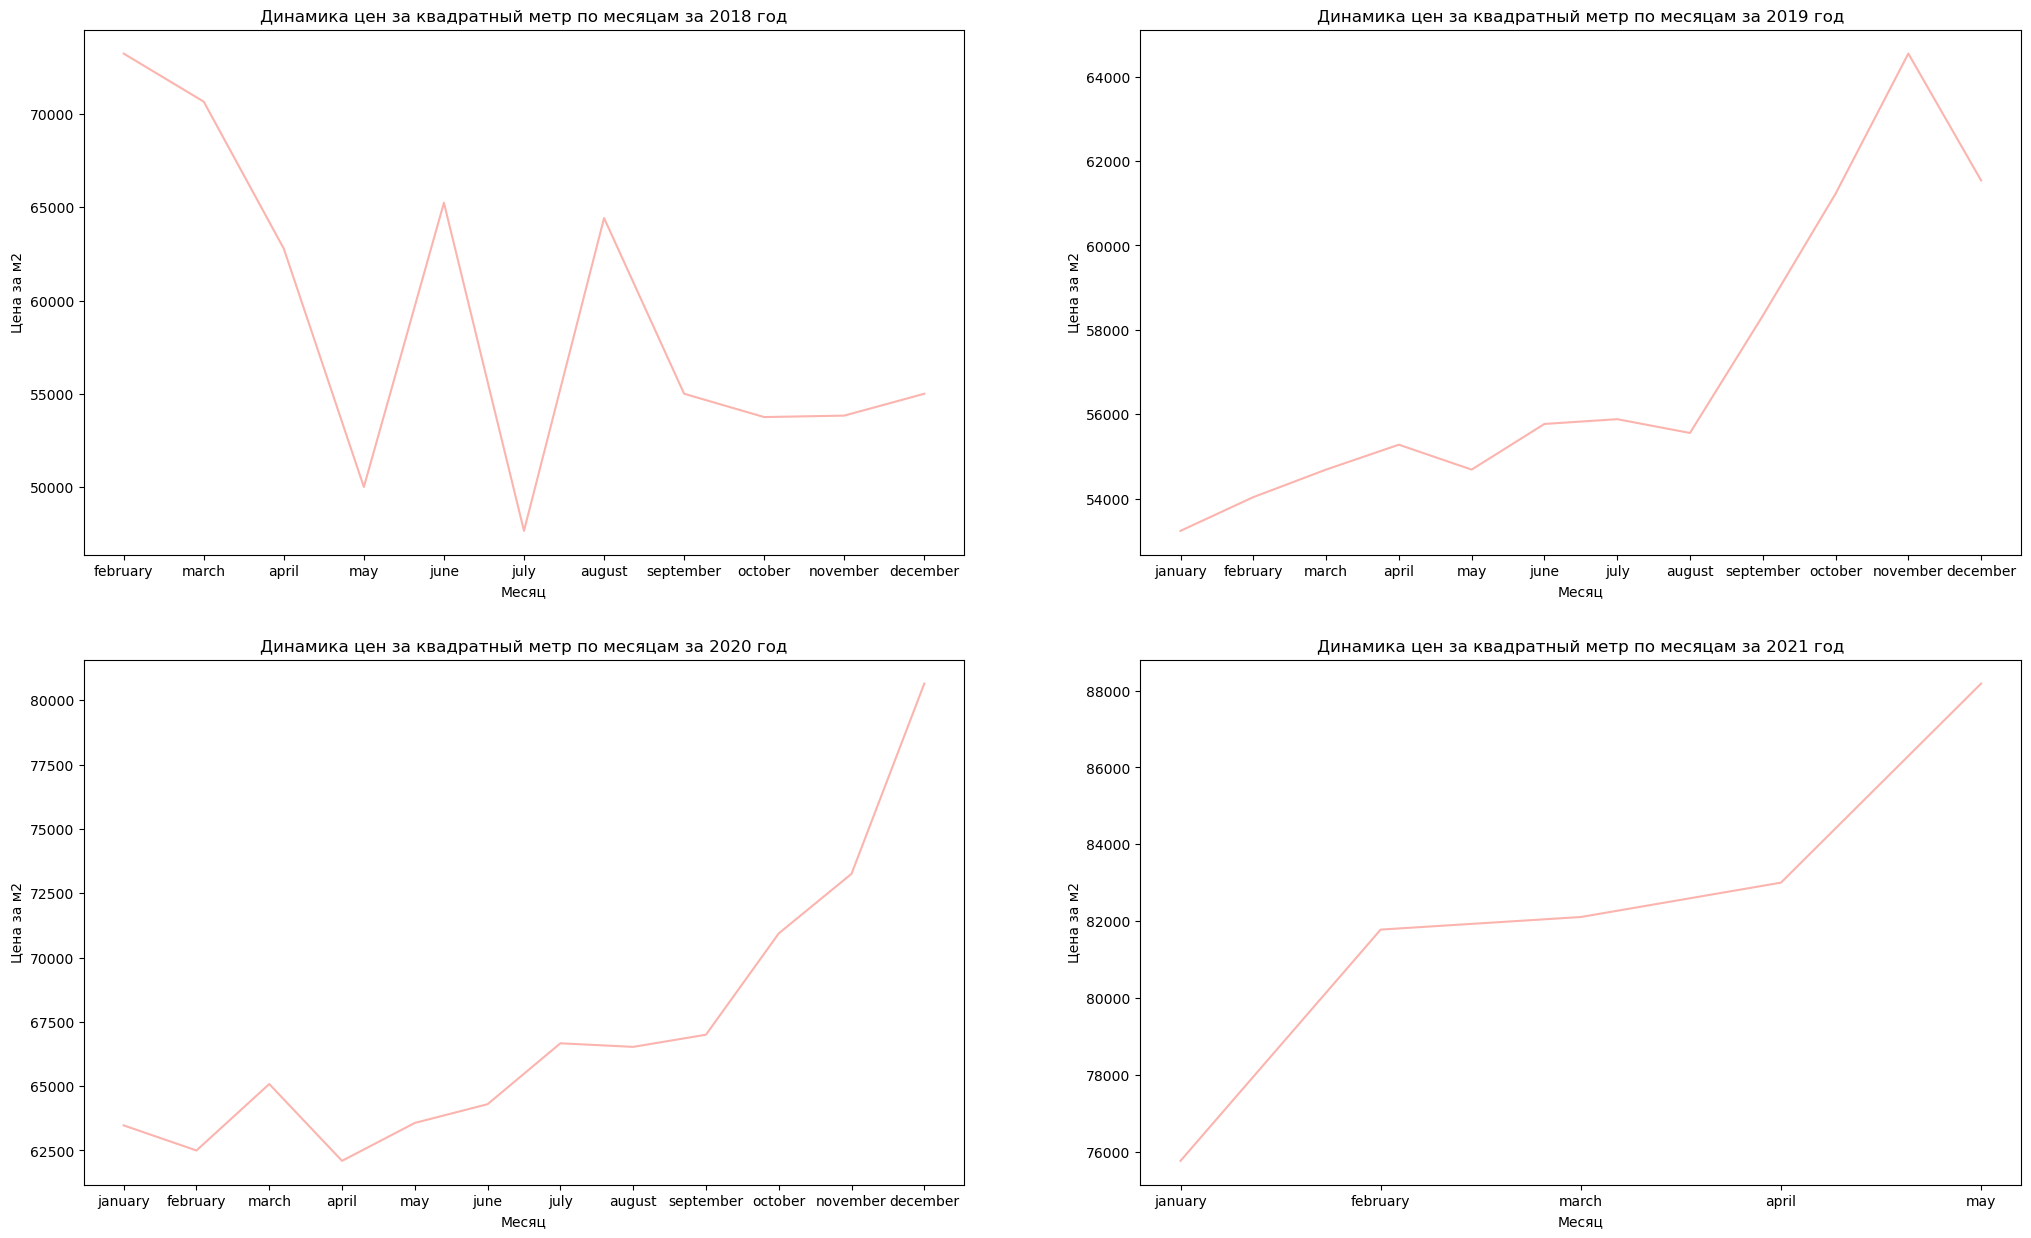

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

sns.lineplot(x='month_name', y='median', data=year_2018, ax=axs[0,0])
axs[0][0].set_title('Динамика цен за квадратный метр по месяцам за 2018 год')
axs[0][0].set_xlabel('Месяц')
axs[0][0].set_ylabel('Цена за м2')

sns.lineplot(x='month_name', y='median', data=year_2019, ax=axs[0,1])
axs[0][1].set_title('Динамика цен за квадратный метр по месяцам за 2019 год')
axs[0][1].set_xlabel('Месяц')
axs[0][1].set_ylabel('Цена за м2')

sns.lineplot(x='month_name', y='median', data=year_2020, ax=axs[1,0])
axs[1][0].set_title('Динамика цен за квадратный метр по месяцам за 2020 год')
axs[1][0].set_xlabel('Месяц')
axs[1][0].set_ylabel('Цена за м2')
           
sns.lineplot(x='month_name', y='median', data=year_2021, ax=axs[1,1])
axs[1][1].set_title('Динамика цен за квадратный метр по месяцам за 2021 год')
axs[1][1].set_xlabel('Месяц')
axs[1][1].set_ylabel('Цена за м2')
           
plt.show()

Как уже отмечалось ранее, в 2018 году явно была какая-то экономическая проблема, которая привела к таким резким скачкам цен на недвижимость. Однако, если смотреть на следующие три года, то явно видна тенденция к росту цен к зиме. Когда цены наиболее высокие - выгодно продавать квартиру, а когда цены низкие - выгодно покупать недвижимость. Таким образом, получается, что, если не учитывать 2018 год, продавать недвижимость выгодно в ноябре и декабре, а покупать - в марте, апреле и мае (то есть весной).

### Динамика цен на первичном и вторичном рынке

`2018` год:

In [ ]:
#Первичный рынок
year_2018_perv = df[(df['year'] == 2018)&(df['object_type'] == 1)].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'] #данных по январю нет
year_2018_perv = year_2018_perv.reindex(month_order)
year_2018_perv

,median
month_name,
january,NaN
february,73244.60
march,63568.65
april,63063.10
may,45762.70
june,70103.10
july,47647.10
august,58530.20
september,56730.25


In [ ]:
#Вторичный рынок
year_2018_vtor = df[(df['year'] == 2018)&(df['object_type'] == 11)].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'] #данных по январю и февралю нет
year_2018_vtor = year_2018_vtor.reindex(month_order)
year_2018_vtor

,median
month_name,
january,NaN
february,NaN
march,90800.0
april,56428.6
may,54105.1
june,62925.0
july,54621.2
august,88750.0
september,48701.8


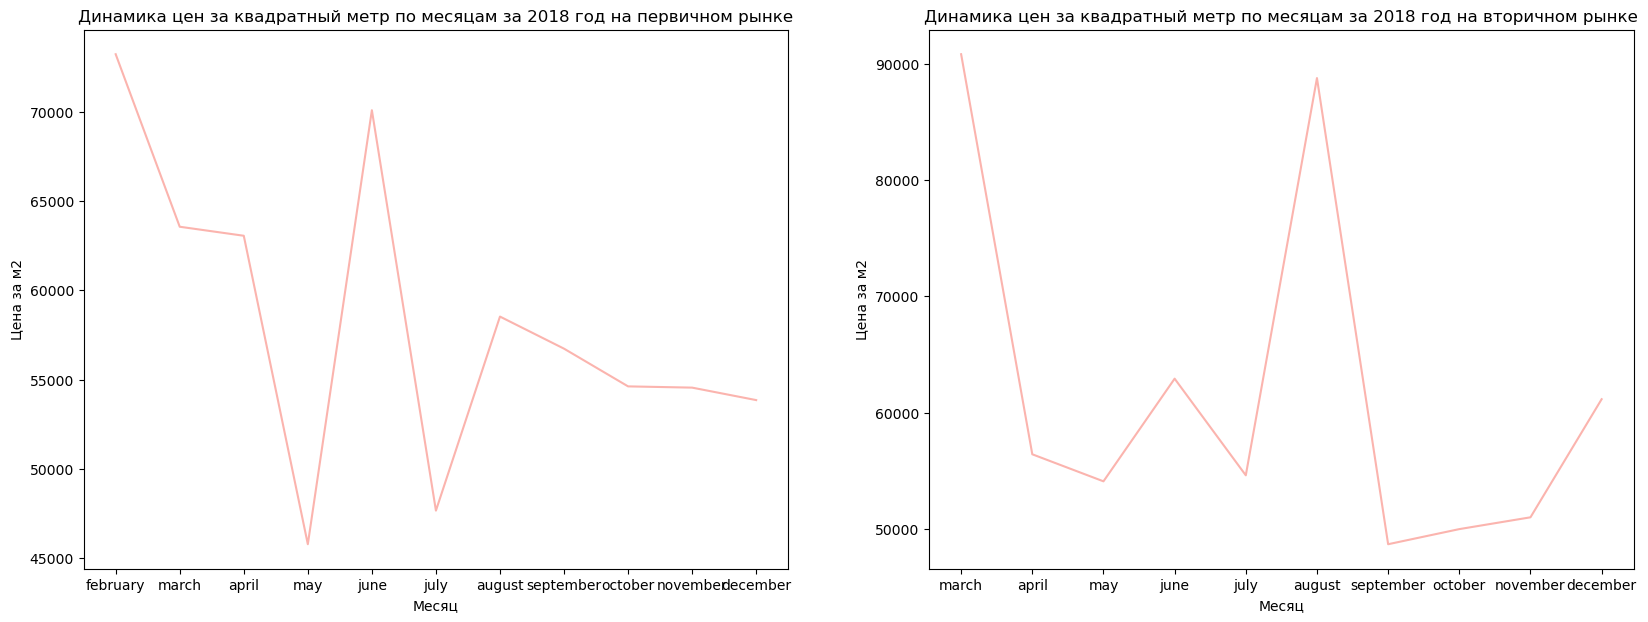

In [ ]:
#Сравним на графике
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

sns.lineplot(x='month_name', y='median', data=year_2018_perv, ax=axs[0])
axs[0].set_title('Динамика цен за квадратный метр по месяцам за 2018 год на первичном рынке')
axs[0].set_xlabel('Месяц')
axs[0].set_ylabel('Цена за м2')

sns.lineplot(x='month_name', y='median', data=year_2018_vtor, ax=axs[1])
axs[1].set_title('Динамика цен за квадратный метр по месяцам за 2018 год на вторичном рынке')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('Цена за м2')

plt.show()

Различий в динамике цен на вторичном и первичном рынке в 2018 году не было.

`2019` год:

In [ ]:
#Первичный рынок
year_2019_perv = df[(df['year'] == 2019)&(df['object_type'] == 1)].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
year_2019_perv = year_2019_perv.reindex(month_order)
year_2019_perv

,median
month_name,
january,54545.50
february,55384.60
march,56428.60
april,56481.50
may,57471.30
june,57258.10
july,56626.50
august,57100.00
september,59062.50


In [ ]:
#Вторичный рынок
year_2019_vtor = df[(df['year'] == 2019)&(df['object_type'] == 11)].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'] #данных по январю и февралю нет
year_2019_vtor = year_2019_vtor.reindex(month_order)
year_2018_vtor

,median
month_name,
january,NaN
february,NaN
march,90800.0
april,56428.6
may,54105.1
june,62925.0
july,54621.2
august,88750.0
september,48701.8


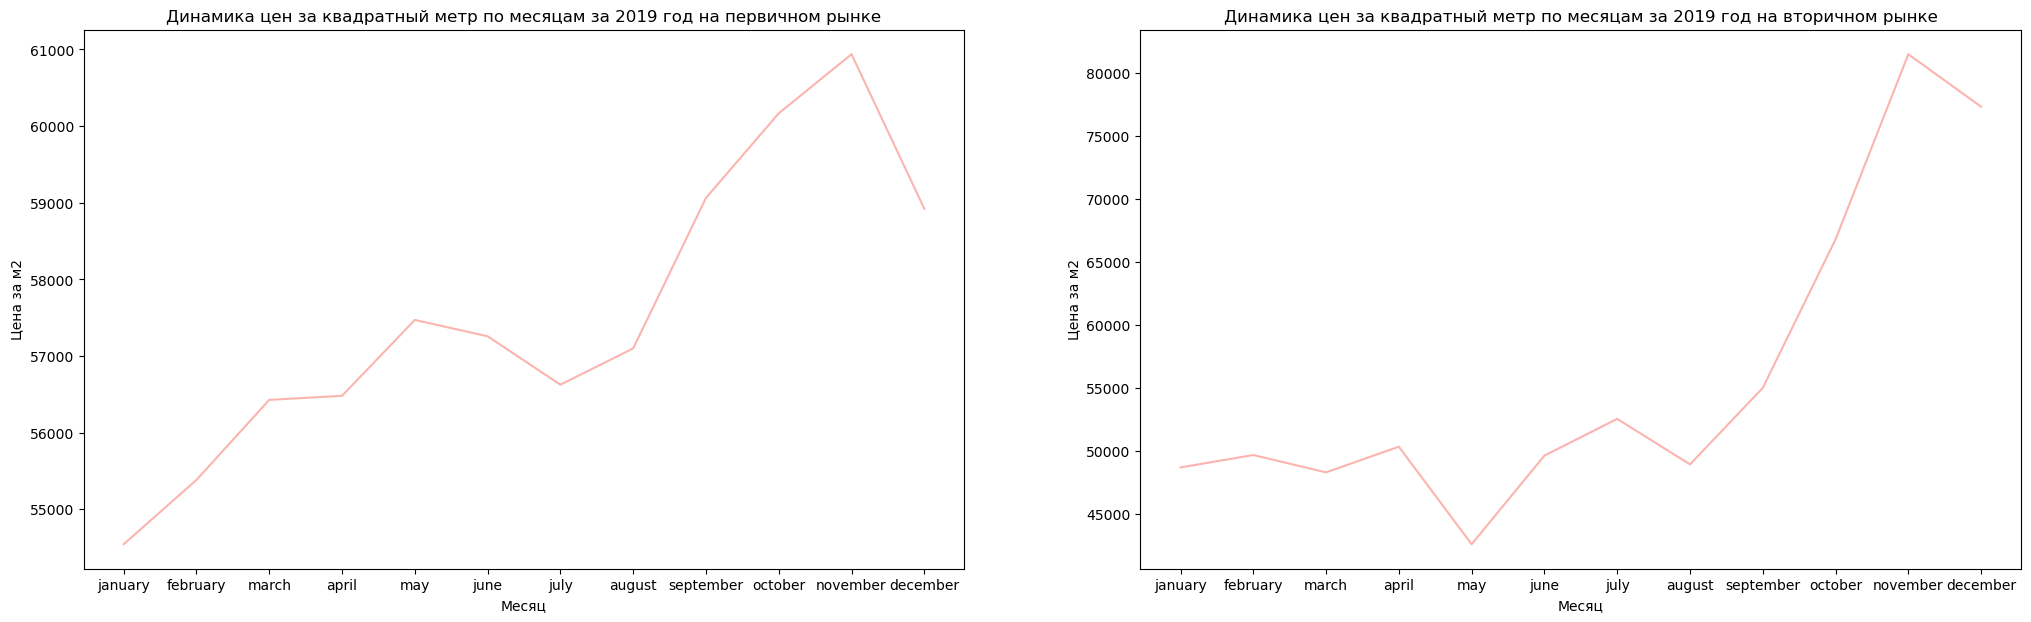

In [ ]:
#Сравним на графике
fig, axs = plt.subplots(1, 2, figsize=(25, 7))

sns.lineplot(x='month_name', y='median', data=year_2019_perv, ax=axs[0])
axs[0].set_title('Динамика цен за квадратный метр по месяцам за 2019 год на первичном рынке')
axs[0].set_xlabel('Месяц')
axs[0].set_ylabel('Цена за м2')

sns.lineplot(x='month_name', y='median', data=year_2019_vtor, ax=axs[1])
axs[1].set_title('Динамика цен за квадратный метр по месяцам за 2019 год на вторичном рынке')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('Цена за м2')

plt.show()

В 2019 году уже наблюдались различия в динамике цен на первичном и вторичном рынках. Если в мае стоимость квадратного метра на первичном рынке вызрастала, то на вторичном рынке она снижалась. Кроме того, на вторичном рынке к концу года был более резкий скачок цен вверх.

`2020` год:

In [ ]:
#Первичный рынок
year_2020_perv = df[(df['year'] == 2020)&(df['object_type'] == 1)].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
year_2020_perv = year_2020_perv.reindex(month_order)
year_2020_perv

,median
month_name,
january,61111.10
february,61020.40
march,61627.90
april,59891.70
may,60714.30
june,61818.20
july,63333.30
august,64772.70
september,64634.10


In [ ]:
#Вторичный рынок
year_2020_vtor = df[(df['year'] == 2020)&(df['object_type'] == 11)].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'] 
year_2020_vtor = year_2020_vtor.reindex(month_order)
year_2020_vtor

,median
month_name,
january,77520.00
february,69512.20
march,80204.15
april,68911.10
may,74654.80
june,74307.15
july,83045.00
august,72619.00
september,75259.10


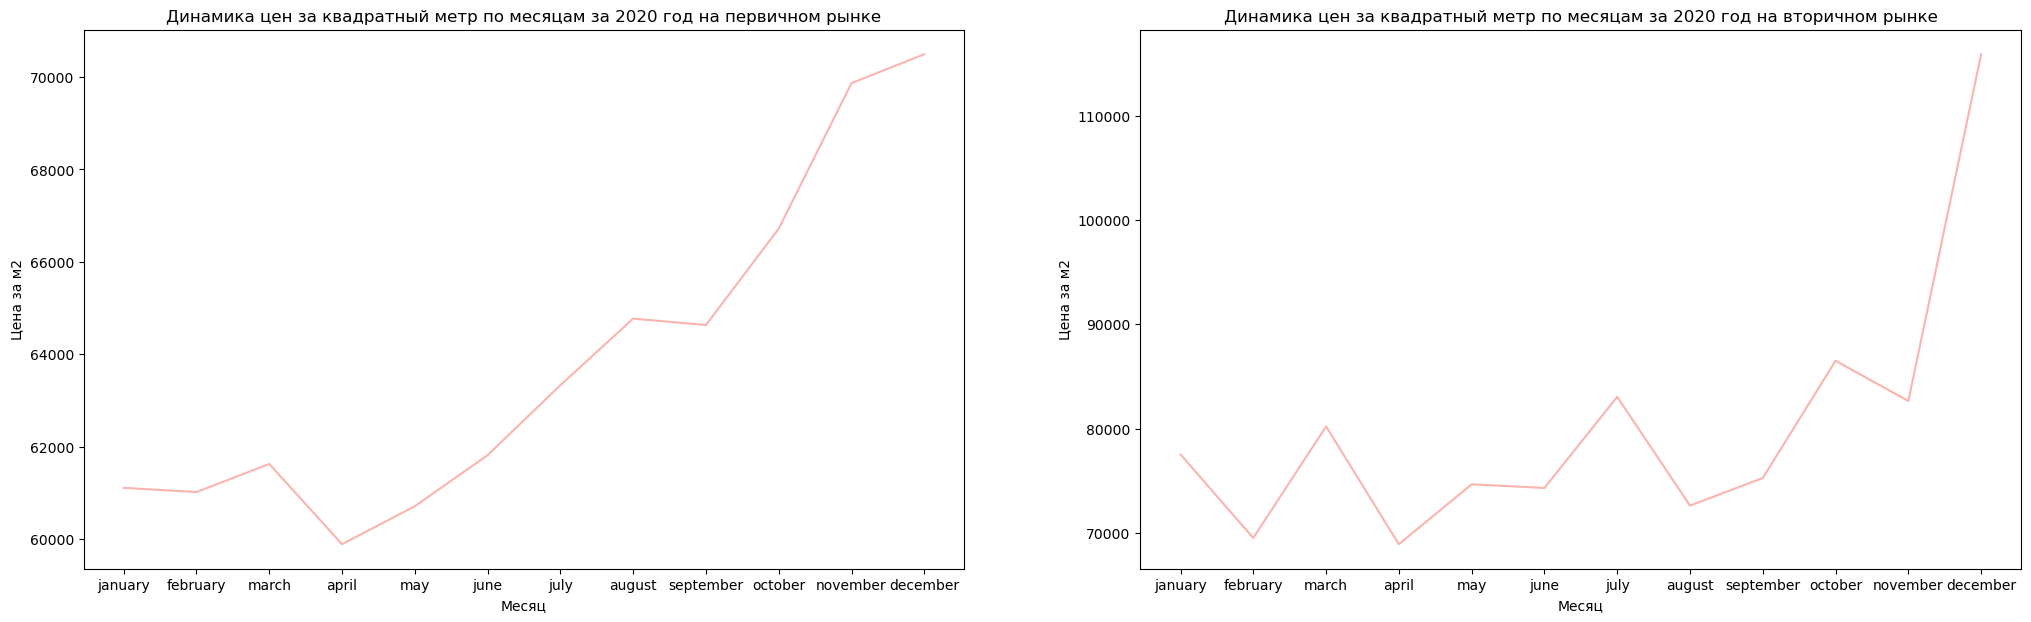

In [ ]:
#Сравним на графике
fig, axs = plt.subplots(1, 2, figsize=(25, 7))

sns.lineplot(x='month_name', y='median', data=year_2020_perv, ax=axs[0])
axs[0].set_title('Динамика цен за квадратный метр по месяцам за 2020 год на первичном рынке')
axs[0].set_xlabel('Месяц')
axs[0].set_ylabel('Цена за м2')

sns.lineplot(x='month_name', y='median', data=year_2020_vtor, ax=axs[1])
axs[1].set_title('Динамика цен за квадратный метр по месяцам за 2020 год на вторичном рынке')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('Цена за м2')

plt.show()

В 2020 году на обоих рынках есть общая тенденция к росту цен, однако на вторичном рынке происходили постоянные скачки. Тем не менее, на обоих рынках дешевле всего квадратный метр стоил в апреле. Однако, в августе стоимость квадратного метра на первичном рынке возросла, в то время как на вторичном рынке упала. В декабре на обоих рынках квадратный метр стоил дороже всего.

`2021` год:

In [ ]:
#Первичный рынок
year_2021_perv = df[(df['year'] == 2021)&(df['object_type'] == 1)].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may'] #данных дальше мая
year_2021_perv = year_2021_perv.reindex(month_order)
year_2021_perv

,median
month_name,
january,70714.30
february,75862.10
march,77064.20
april,78947.40
may,79520.15


In [ ]:
#Вторичный рынок
year_2021_vtor = df[(df['year'] == 2021)&(df['object_type'] == 11)].groupby('month_name')['price_m2'].agg(['median'])

month_order = ['january', 'february', 'march', 'april', 'may'] #данных дальше мая нет
year_2021_vtor = year_2021_vtor.reindex(month_order)
year_2021_vtor

,median
month_name,
january,95552.35
february,103874.90
march,104800.70
april,99427.10
may,131000.00


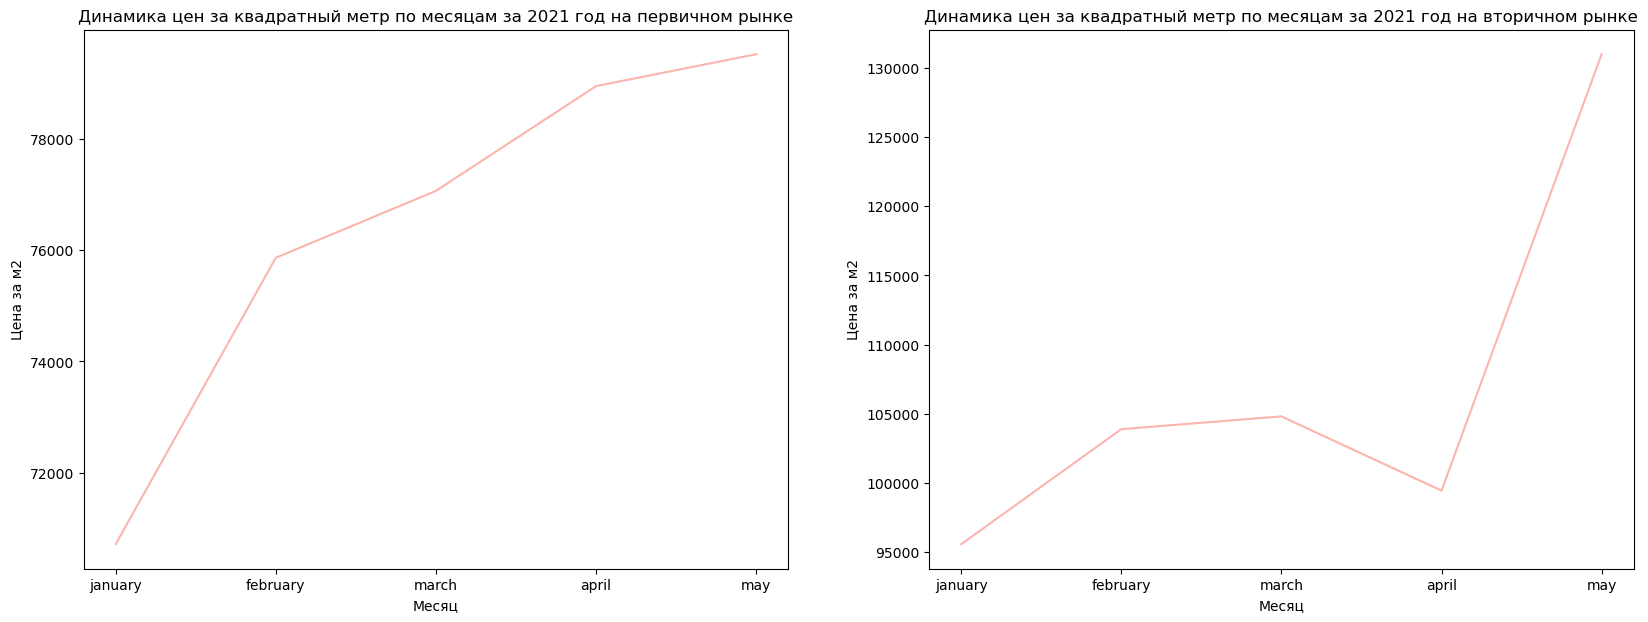

In [ ]:
#Сравним на графике
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

sns.lineplot(x='month_name', y='median', data=year_2021_perv, ax=axs[0])
axs[0].set_title('Динамика цен за квадратный метр по месяцам за 2021 год на первичном рынке')
axs[0].set_xlabel('Месяц')
axs[0].set_ylabel('Цена за м2')

sns.lineplot(x='month_name', y='median', data=year_2021_vtor, ax=axs[1])
axs[1].set_title('Динамика цен за квадратный метр по месяцам за 2021 год на вторичном рынке')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('Цена за м2')

plt.show()

В 2021 году динамика цен на первичном и вторичном рынке сильно отличалась. Если в начале года на обоих рынках прослеживалась тенденция к увеличению цены, то в апреле на вторичном рынке цена резко упала, в то время как на первичном продолжила рости. 

### Число проданных квартир по месяцам

Посмотрим на число проданных квартир по месяцам за 2018-2021 год.

In [ ]:
df['month_name'].value_counts()

march        556693
april        530089
september    519490
october      509668
november     498518
december     495926
february     465380
july         389782
june         351589
january      341125
may          312434
august       259851
Name: month_name, dtype: int64

Получается, что в марте было совершено больше всего продаж и покупок, а в августе - меньше всего. Это свидетельствует о том, что весной спрос и предложение на квартиры больше, чем летом.

<div class="alert alert-block alert-success">
<b>Вывод:</b><br>
    1. Наблюдая за динамикой цен на квадратный метр за четыре года можно увидеть тенденцию к увеличению стоимости квартир к зиме. Соответственно, судя по общей динамике за каждый год, можно сделать вывод о том, что продавать квартиру выгоднее всего поздней осенью-ранней зимой. С каждым годом цены увеличиваются, поэтому также стоит учитывать инфляцию. Покупать квартиру выгодее всего весной, когда цены на недвижимость падают. <br>
    2. Если смотреть на динамику цен на первичном и вторичном рынке, то в целом прослеживается тенденция увеличения стоимости к концу года, однако динамика все равно отличается - на вторичном рынке возникают частые скачки цен, а на первичном цена растет более ровно. В целом относительно благоприятно было бы покупать недвижимость весной, ближе к лету, и продавать ближе к зиме - в ноябре и декабре. <br>
    3. Судя по числу проданных/купленных квартир по месяцам, чаще всего сделки совершаются в марте и апреле. Это может говорить нам о том, что в это время на рынке больше предложений недвижимости и больше спрос. Возможно ранее сделанные выводы верны, и людям действительно выгоднее покупать недвижимость весной, и отсюда такое большое количество сделок по купле-продаже. Меньше всего спрос и предложение на рынке в августе, потому что в августе число сделок было совершено в два раза меньше, нежели весной.

[Вернуться к навигации](#9th)

<div style="background-color: mistyrose; padding: 5px; border-radius: 100px;">
    <a class="anchor" id="6th"></a> 
    <div align = "center">
    <h1 style="color: darkred;"> 6. Определение от каких признаков зависит стоимость объекта недвижимости. Поиск скрытых закономерностей

In [ ]:
df.head(1)

,price,price_m2,date,year,month,month_name,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,2018-02-19,2018,2,february,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


**Для того, чтобы узнать, от каких признаков зависит стоимость объекта недвижимости, нужно:** <br>
    - Построить матрицу корреляции для цены квадратного метра объекта недвижимости <br>
    - Построить матрицу корреляции для стоимости объекта недвижимости <br>
**Для поиска скрытых закономерностей необходимо:** <br>
    - Проанализировать связь с категориальными переменными <br>
    - Проанализировать связь с временными данными <br>

### Определение зависимости

**Построим матрицу корреляции для стоимости квадратного метра объекта недвижимости**

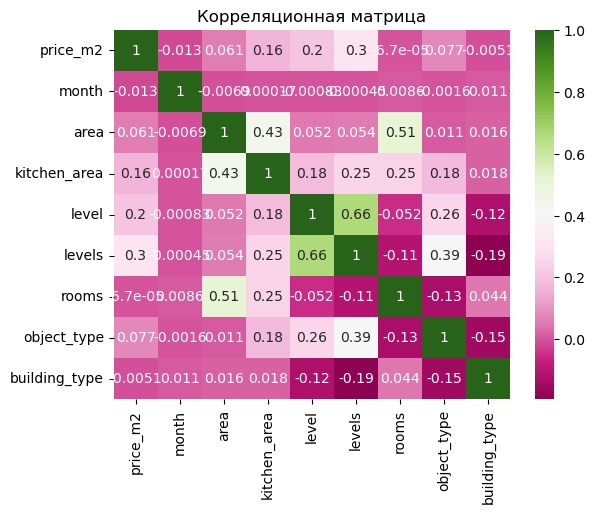

In [ ]:
full_dependence_m2 = df[['price_m2', 'month', 'area', 'kitchen_area', 'level', 'levels', 'rooms', 'object_type', 'building_type']]

sns.heatmap(full_dependence_m2.corr(), annot=True, cmap='PiYG')
plt.title('Корреляционная матрица')
plt.show()

Таким образом, связь цены за м2 объекта недвижимости от: <br>
`month` = -0.013 <br>
`area` = 0.061 <br>
`kitchen_area` = 0.16 <br>
`level` = 0.2 <br>
`levels` = **0.3** <br>
`rooms` = -0.000067 <br>
`object_type` = 0.077 <br>
`building_type` = -0.0051 <br>
Получается, что больше всего стоимость цены за квадратный метр зависит от количества этажей в доме.

**Теперь построим матрицу корреляции для стоимости объекта недвижимости, чтобы сравнить показатели**

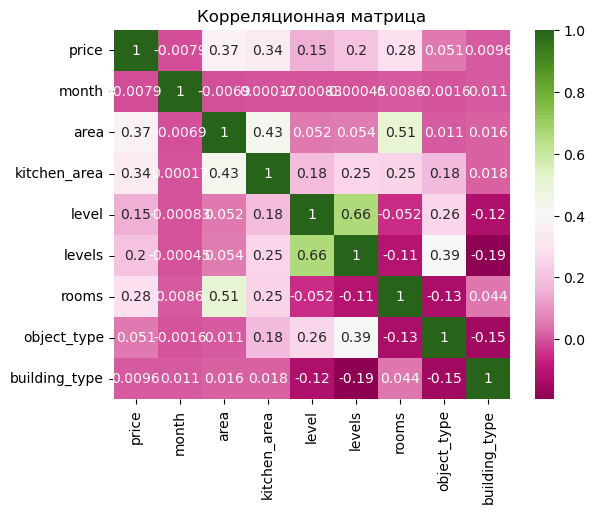

In [ ]:
full_dependence = df[['price', 'month', 'area', 'kitchen_area', 'level', 'levels', 'rooms', 'object_type', 'building_type']]

sns.heatmap(full_dependence.corr(), annot=True, cmap='PiYG')
plt.title('Корреляционная матрица')
plt.show()

Таким образом, связь цены объекта недвижимости от: <br>
`month` = -0.0079 <br>
`area` = **0.37** <br>
`kitchen_area` = **0.34** <br>
`level` = 0.15 <br>
`levels` = 0.2 <br>
`rooms` = -0.28 <br>
`object_type` = 0.051 <br>
`building_type` = 0.0096 <br>
Получается, что больше всего стоимость цены зависит от общей площади квартиры и площади кухни. Меньше всего цена зависит от типа здания. Кроме того, существует слабая обратная связь между стоимостью квартиры и количеством комнат. 

### Поиск скрытых закономерностей

**Проанализируем связь с категориальными переменными**

*Проверим гипотезу:* <br>
H0: Цена квадратного метра не зависит от региона <br>
H1: Цена квадратного метра зависит от региона <br>

Добавим столбец с категоризацией столбца price_m2. Для этого нужно определить минимальные и максимальные значения стоимости цены за квадратный метр.

In [ ]:
df['price_m2'].describe().round(2)
#Напомню, что нулевые значения мы не исключали и не ставили минимальную цену квартир из-за возможных сделаок по дарению

count    5230545.00
mean       79718.41
std        63471.23
min            0.00
25%        44303.80
50%        62005.30
75%        93181.80
max      9359375.00
Name: price_m2, dtype: float64

In [ ]:
#Проведем категоризацию
def price_d(counts):
    if counts == 0 :
         return 'Бесплатно'
    elif 1 <= counts <= 1559896:
        return 'Низкая цена' 
    elif 1559897 <= counts <= 3119792:
        return 'Цена ниже среднего'
    elif 3119793 <= counts <= 4679688:
        return 'Средняя цена' 
    elif 4679689 <= counts <= 6239583:
        return 'Цена выше среднего' 
    elif 6239584 <= counts <= 7799479:
        return 'Высокая цена' 
    else:
        return 'Очень высокая цена0,'

#Добавим столбец
price_m2_name = price_m2.apply(price_d)
df.insert(loc = 2, column = 'price_m2_name', value = price_m2_name)
df.head(1)

,price,price_m2,price_m2_name,date,year,month,month_name,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,Низкая цена,2018-02-19,2018,2,february,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


In [ ]:
#Создадим таблицу сопряженности
contingency_table = pd.crosstab(df['price_m2_name'], df['reg_name'])
print(contingency_table)

reg_name              Алтайский край  Амурская область  Архангельская область  \
price_m2_name                                                                   
Бесплатно                          0                 0                      0   
Высокая цена                       0                 0                      0   
Низкая цена                    73269              2160                   3953   
Очень высокая цена0,               0                 0                      0   
Средняя цена                       0                 0                      0   
Цена выше среднего                 0                 0                      0   
Цена ниже среднего                 0                 0                      0   

reg_name              Астраханская область  Белгородская область  \
price_m2_name                                                      
Бесплатно                                0                     0   
Высокая цена                             0                     0  

In [ ]:
#Посчитаем критерий Пирсона
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"χ²: {chi2}, p-значение: {p}")

χ²: 1744.4998158221583, p-значение: 1.775310907115232e-139


Т.к p-значение больше уровня значимости (0.05), то мы можем принять нулевую гипотезу о независимости, а значит нет статистически значимой связи между переменными. Цена за квадратный метр не зависит от региона. (Такой вывод наверняка связан с преобладанием небольших городов в регионах над крупными мегаполисами, а также со способом деления цены на категории) 

**Проанализировать связь с временными данными**

Данный пункт уже был проанализирован в исследовании про выгоду купли/продажи недвижимости. <br>

Был сделан вывод о том, что существует общая тенденция к увеличению стоимости недвижимости от начала к концу года, и, соотвественно, из года в год. <br>

Также были сделаны выводы про то, что весной цена на недвижимость падает, а в конце осени возрастает, однако это может быть шумом и не означать наличие зависимости между месяцами. Также при построении матрицы корреляции мы учитывали связь стоимости с месяцами, которая была отрицательная и очень незначительная, что также ставит выводы о наличии зависимости стоимости с месяцами под сомнения. <br>

<div class="alert alert-block alert-success">
<b>Вывод:</b><br>
    1. Цена за квадратный метр объекта недвижимости в большей степени зависит от количества этажей в доме, однако связь слабая. <br>
    2. Тем временем стоимость объекта недвижимости в большей степени зависит от площади квартиры и площади кухни (По шкале Чеддока связь между признаками умеренная) <br>
    3. Посчитав критерий Пирсона мы выяснили, что цена за квадратный метр не зависит от региона. Такой вывод может быть связан с преобладанием небольших городов в регионах над крупными мегаполисами, а также с тем, что цена при категоризации делилась на равные промежутки. <br>
    4. В пункте 5 был сделан вывод о том, что существует общая тенденция к увеличению стоимости недвижимости от начала к концу года, и, соотвественно, из года в год. Также были сделаны выводы про то, что весной цена на недвижимость падает, а в конце осени возрастает, однако это может быть шумом и не означать наличие зависимости между месяцами. Также при построении матрицы корреляции мы учитывали связь стоимости с месяцами, которая была отрицательная и очень незначительная, что также ставит выводы о наличии зависимости стоимости с месяцами под сомнения. <br>

[Вернуться к навигации](#9th)

<div style="background-color: mistyrose; padding: 5px; border-radius: 100px;">
    <a class="anchor" id="7th"></a> 
    <div align = "center">
    <h1 style="color: darkred;">  7. Выдвижение и проверка собственной гипотезы статистическими методами

In [ ]:
df.head(1)

,price,price_m2,price_m2_name,date,year,month,month_name,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,Низкая цена,2018-02-19,2018,2,february,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


Стоит проверить гипотезу о том, что стоимость квадратного метра в крупных городах больше стоимости квадратного метра в небольших городах, чтобы яснее понимать зависимость цены от регионов. <br>

`Н0`: Между стоимостью за квадратный метр в крупных городах и небольших городах нет статистически значимых различий. <br>
`Н1`: Есть статистически значимые различия между выборками

### Для начала нужно проверить распределения двух выборок на нормальность

In [ ]:
#Посмотрим на средние значения стоимости квадратного метра по регионам.
df.groupby('reg_name')['price_m2'].describe().sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
reg_name,,,,,,,,
Москва,433234.0,209002.406795,100930.678521,0.0,155333.650,189743.60,235849.100,3340000.0
Санкт-Петербург,456089.0,132162.570110,54502.189477,0.0,101785.700,121875.00,148145.100,2169811.3
Московская область,495420.0,93775.357495,42996.182972,0.0,66455.700,90625.00,114755.000,1945122.0
Республика Крым,6869.0,88358.153559,34518.106723,11.1,68421.100,83333.30,101246.100,589830.5
Амурская область,2160.0,85062.766343,24755.281705,66.7,71864.650,85595.25,100255.275,342465.8
Ленинградская область,52596.0,83676.402681,34446.136917,12.9,62963.000,84789.10,104219.650,1285714.3
Ямало-Ненецкий автономный округ,356.0,77793.094663,70379.380475,363.6,43146.675,68004.40,102485.275,1108545.0
Архангельская область,3953.0,72409.089249,21304.164359,500.0,61627.900,74475.10,85856.000,288184.4
Хабаровский край,2204.0,71883.311661,33615.568089,31.8,44367.925,69091.75,97012.725,204166.7


Видим, что помимо крупных регионов в ТОПе есть отдаленные регионы со сложными условиями жизни, где средняя зарплата выше, чем в обычных регионах.

In [ ]:
#Обозначим выборки. В качестве больших городов выберем ТОП-10 наибольших по численности населения регионов.
big_city = df[(df['reg_name'] == 'Москва') | (df['reg_name'] == 'Московская область') | (df['reg_name'] == 'Санкт-Петербург') | (df['reg_name'] == 'Краснодарский край')| (df['reg_name'] == 'Свердловская область') | (df['reg_name'] == 'Ростовская область') | (df['reg_name'] == 'Республика Башкортостан') | (df['reg_name'] == 'Республика Татарстан') | (df['reg_name'] == 'Тюменская область') | (df['reg_name'] == 'Челябинская область')]['price_m2']
small_city = df[~((df['reg_name'] == 'Москва') | (df['reg_name'] == 'Московская область') | (df['reg_name'] == 'Санкт-Петербург') | (df['reg_name'] == 'Краснодарский край')| (df['reg_name'] == 'Свердловская область') | (df['reg_name'] == 'Ростовская область') | (df['reg_name'] == 'Республика Башкортостан') | (df['reg_name'] == 'Республика Татарстан') | (df['reg_name'] == 'Тюменская область') | (df['reg_name'] == 'Челябинская область'))]['price_m2']

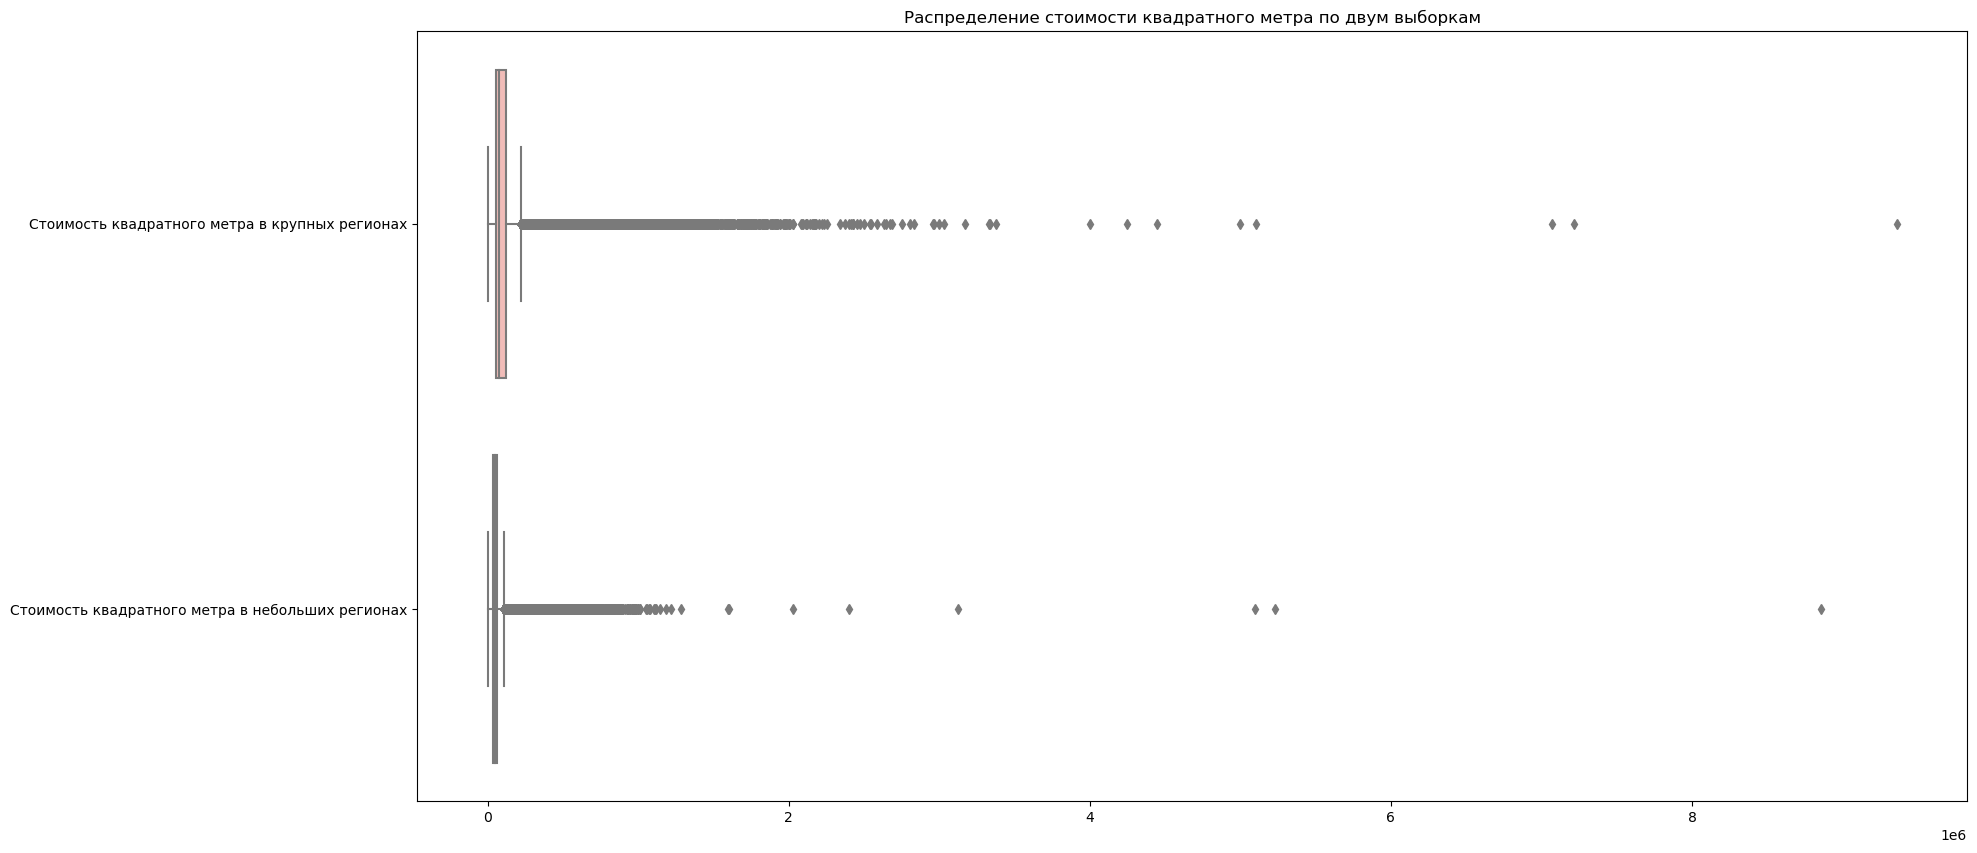

In [ ]:
#Построим боксплоты
price_m2_b_s = pd.DataFrame({'Стоимость квадратного метра в крупных регионах': big_city, 'Стоимость квадратного метра в небольших регионах': small_city})

plt.figure(figsize = (20, 10))

sns.boxplot(price_m2_b_s, orient='h').set(title='Распределение стоимости квадратного метра по двум выборкам')
plt.show()

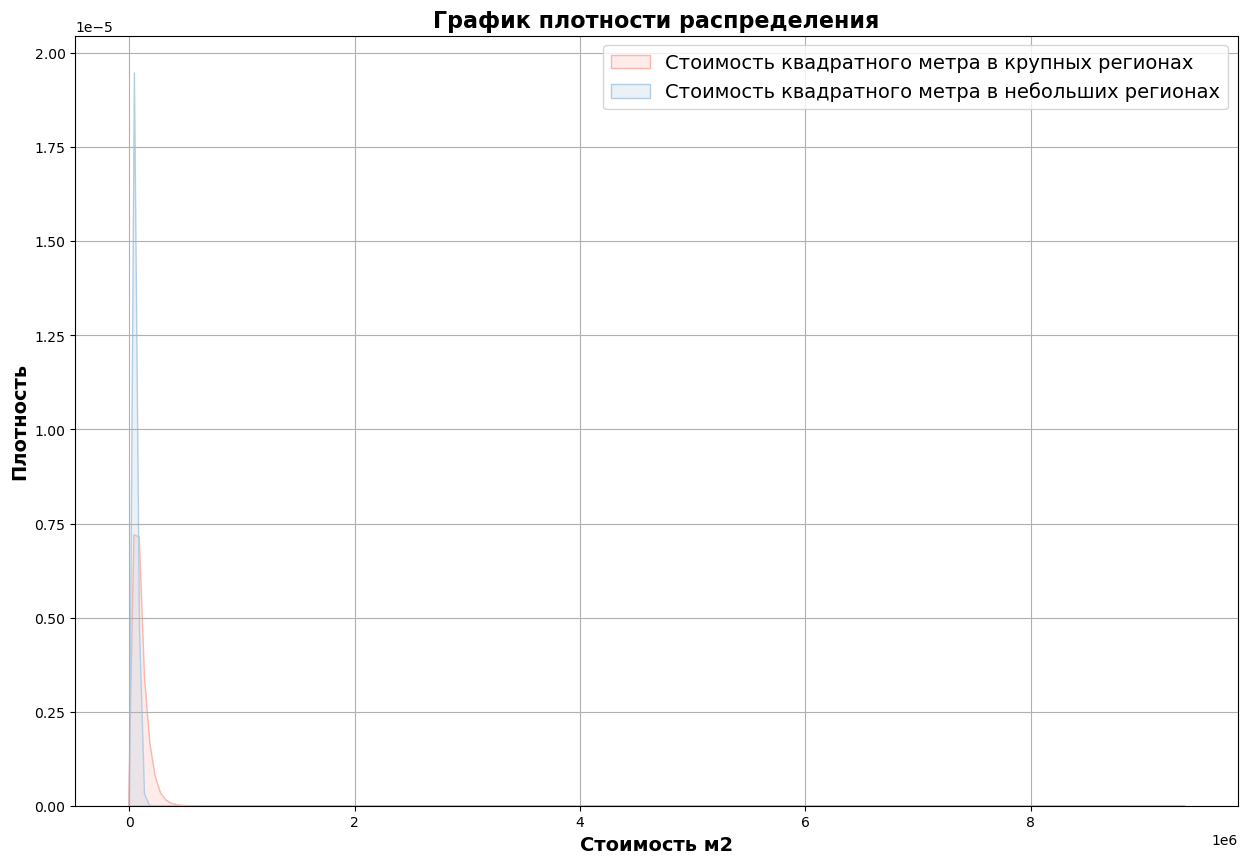

In [ ]:
#Посмотрим на плотность распределения
plt.figure(figsize=(15, 10))

sns.kdeplot(big_city, fill=True, label='Стоимость квадратного метра в крупных регионах')
sns.kdeplot(small_city, fill=True, label='Стоимость квадратного метра в небольших регионах')

plt.xlabel('Стоимость м2', fontsize=14, fontweight="bold")
plt.ylabel('Плотность', fontsize=14, fontweight="bold")
plt.title('График плотности распределения', fontsize=16, fontweight="bold")
plt.grid(True)
plt.legend(fontsize=14)

plt.show()

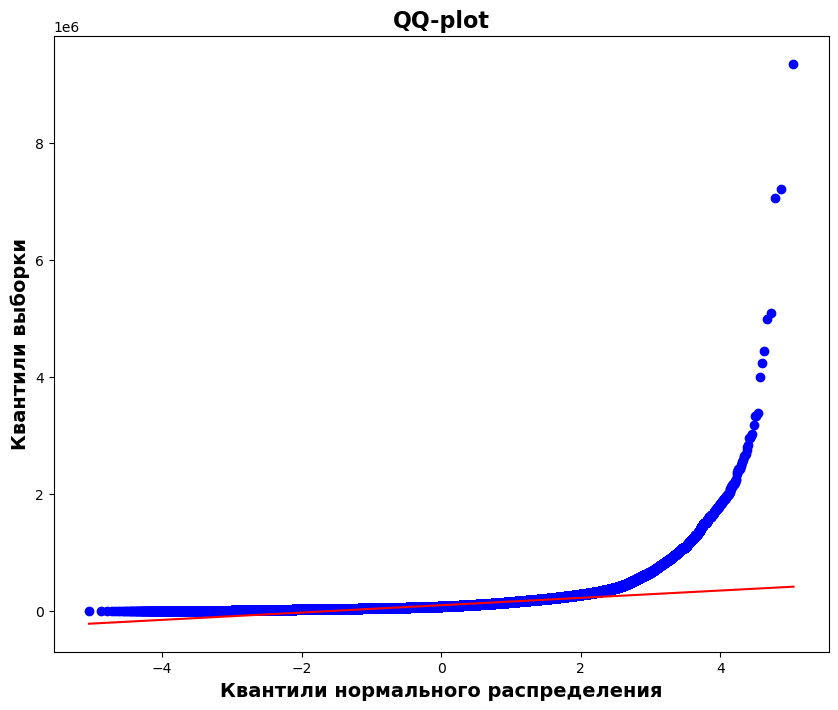

In [ ]:
#Проверим на нормальность распределение выборки 1 с помощью qq-plot
plt.figure(figsize=(10, 8))

st.probplot(big_city, dist='norm', plot=plt)
plt.title('QQ-plot', fontsize=16, fontweight="bold")
plt.xlabel('Квантили нормального распределения', fontsize=14, fontweight="bold")
plt.ylabel('Квантили выборки', fontsize=14, fontweight="bold")
plt.show()

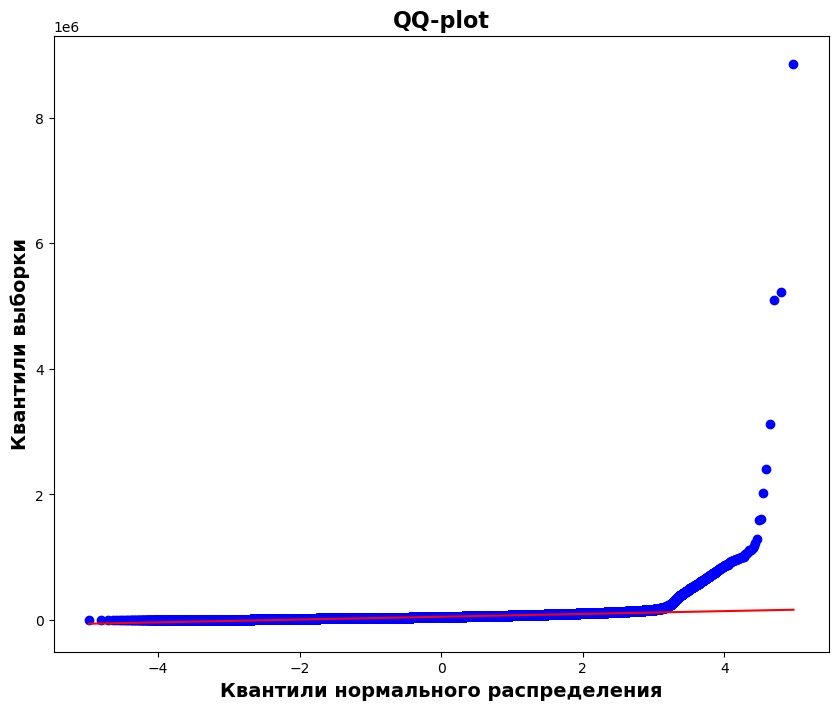

In [ ]:
#Проверим на нормальность распределение выборки 2 с помощью qq-plot
plt.figure(figsize=(10, 8))

st.probplot(small_city, dist='norm', plot=plt)
plt.title('QQ-plot', fontsize=16, fontweight="bold")
plt.xlabel('Квантили нормального распределения', fontsize=14, fontweight="bold")
plt.ylabel('Квантили выборки', fontsize=14, fontweight="bold")
plt.show()

Мы убедились в том, что **цены не имеют нормального распределения**, поэтому сравнивать их будем с помощью теста Манна-Уитни и метода bootstrap

`Н0`: Между стоимостью за квадратный метр в крупных городах и небольших городах нет статистически значимых различий. <br>
`Н1`: Есть статистически значимые различия между выборками

### Тест Манна-Уитни

In [ ]:
alfa = 0.05

from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(big_city, small_city)

if p_value <= alfa:
    print('Отвергаем нулевую гипотезу. Есть статистически значимые различия между группами.')
else:
    print('Не можем отвергнуть нулевую гипотезу. Статистически значимых различий между группами нет.')

Отвергаем нулевую гипотезу. Есть статистически значимые различия между группами.


### Метод bootstrap

In [ ]:
from tqdm import tqdm 

CONF_LVL = 0.95

def bootstrap_ci(
    big_city,  # числовые значения первой выборки
    small_city,  # числовые значения второй выборки
    boot_it=3000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_len = max([len(big_city), len(small_city)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = big_city.sample(
            boot_len, 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = small_city.sample(
            boot_len,  # чтобы сохранить дисперсию, берем такой же размер выборки
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1) - statistic(samples_2))  # разность средних
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    #  Вычисляем p-value 
    #  Предположим, что нулевая гипотеза - разницы между выборками нет
    p_1 = norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}


# Уровень значимости
alfa = 0.05

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [21:43<00:00,  2.30it/s]


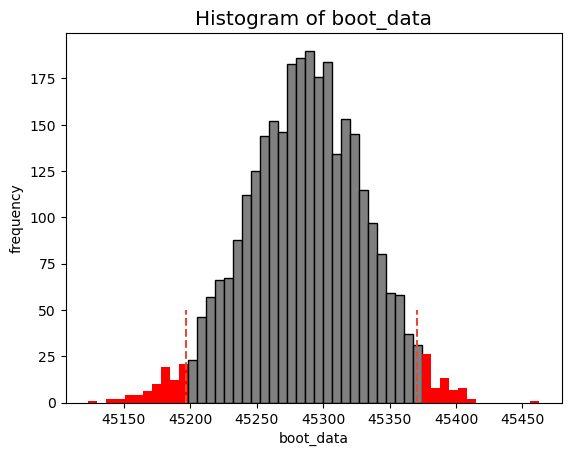

Средние: p-value = 0.0000000000000000000000000000000000000000
Отвергаем нулевую гипотезу: средние значения в группах отличаются.


In [ ]:
# Сравнение средних
result_mean = bootstrap_ci(big_city, small_city, statistic=np.mean)
print(f"Средние: p-value = {result_mean['p_value']:.40f}")
if result_mean['p_value'] <= alfa:
    print("Отвергаем нулевую гипотезу: средние значения в группах отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу: средние значения в группах не отличаются.")

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [33:38<00:00,  1.49it/s]


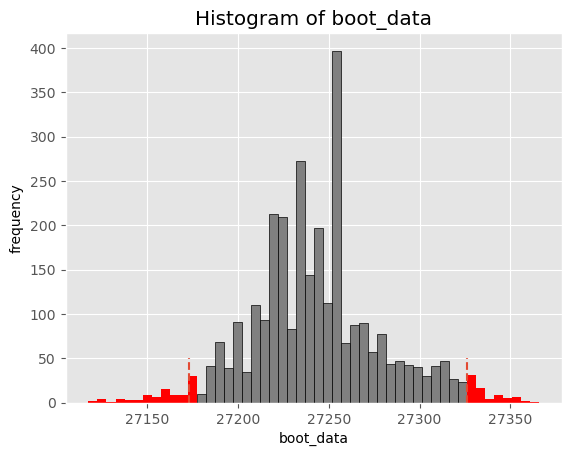

Средние: p-value = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Отвергаем нулевую гипотезу: медианы в группах статистически значимо отличаются.


In [ ]:
# Сравнение медиан
result_median = bootstrap_ci(big_city, small_city, statistic=np.median)
print(f"Средние: p-value = {result_median['p_value']:.200f}")
if result_median['p_value'] <= alfa:
    print("Отвергаем нулевую гипотезу: медианы в группах статистически значимо отличаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу: медианы в группах статистически значимо не отличаются.")

<div class="alert alert-block alert-success">
<b>Вывод:</b><br>
    В качестве гипотезы было взято суждение о том, что цены за квадратный метр в крупных регионах и небольших регионах статистически отличаются. Было выяснено, что обе выборки не имеют нормального распределения, что стало причиной выбора в качестве способов проверки гипотезы методов Манна-Уитни и bootstrap. По итогам первого способа между выборками есть статистические различия. Во втором способе в качестве рассматриваемых данных была взята средняя и медианная цена квадратного метра, однако результат не изменился. Действительно, стоимость квадратного метра в крупных регионах и небольших регионах статистически отличаются.

[Вернуться к навигации](#9th)

<div style="background-color: mistyrose; padding: 5px; border-radius: 100px;">
    <a class="anchor" id="8th"></a> 
    <div align = "center">
    <h1 style="color: darkred;"> 8.  Создание модели прогноза цены объекта недвижимости

In [ ]:
df.head(1)

,price,price_m2,price_m2_name,date,year,month,month_name,reg_code,reg_name,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,73244.6,Низкая цена,2018-02-19,2018,2,february,2661,Санкт-Петербург,1,8,10,3,82.6,10.8,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LassoCV, RidgeCV

### Для начала возьмем все факторы и посмотрим на модели

In [ ]:
y = df['price']
x = df[['year', 'month','building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

#### 1 модель. LR - линейная регрессия

In [ ]:
model = LinearRegression()

# обучим нашу модель
model.fit(x, y)

# напечатаем коэффициенты
print(model.coef_, model.intercept_)

y_pred = model.predict(x)

r2_score(y, y_pred)

[721598.48405835  70381.655253   127943.28174316  19054.70112304
 142121.95341744 814873.26600996  39259.64460265 163628.13337951
 -32345.00792654] -1460389645.0816736


0.22418400117434667

Видим очень маленькое значение коэффициента детерминации, нужно всеми силами его поднять.

**Допущения**

C:\Users\Zatse\AppData\Local\Temp\ipykernel_16316\551311748.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\Zatse\AppData\Local\Temp\ipykernel_16316\551311748.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()],  "k--", color='r')


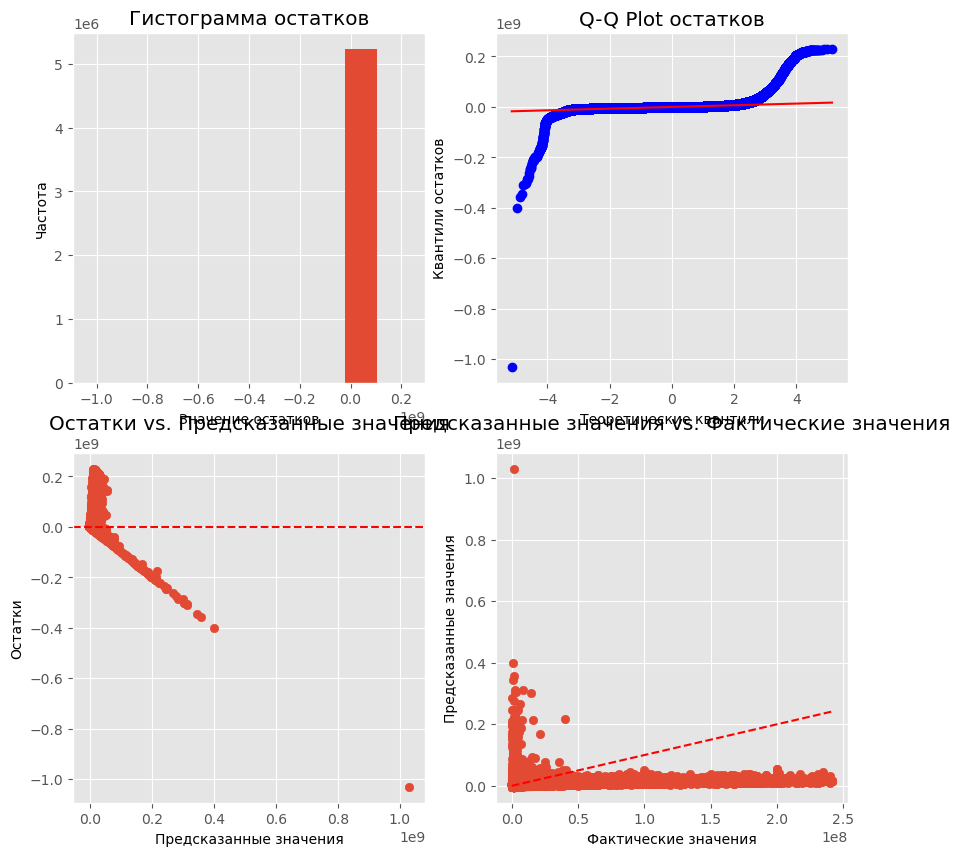

In [ ]:
import statsmodels.api as sm

# Получение остатков модели
residuals = y - y_pred

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')

plt.show()

По графикам все тоже очень плохо. Дальше можно не исследовать все факторы.

#### 2  модель. SLR - стандартизированная линейная регрессия

In [ ]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)


x_test_st = scaler.transform(x_test)

predictions = model.predict(x_test_st)

r2_score(y_test, predictions)

[ 632372.09322729  250578.0319447   134443.7234657    96870.2406724
  946588.26873098  861164.05630693 1313043.80350894  945236.78985473
 -143869.51912982] 4415338.322414949


0.22151259333282725

**Допущения**

C:\Users\Zatse\AppData\Local\Temp\ipykernel_16316\421924994.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\Zatse\AppData\Local\Temp\ipykernel_16316\421924994.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения vs. Фактические значения')

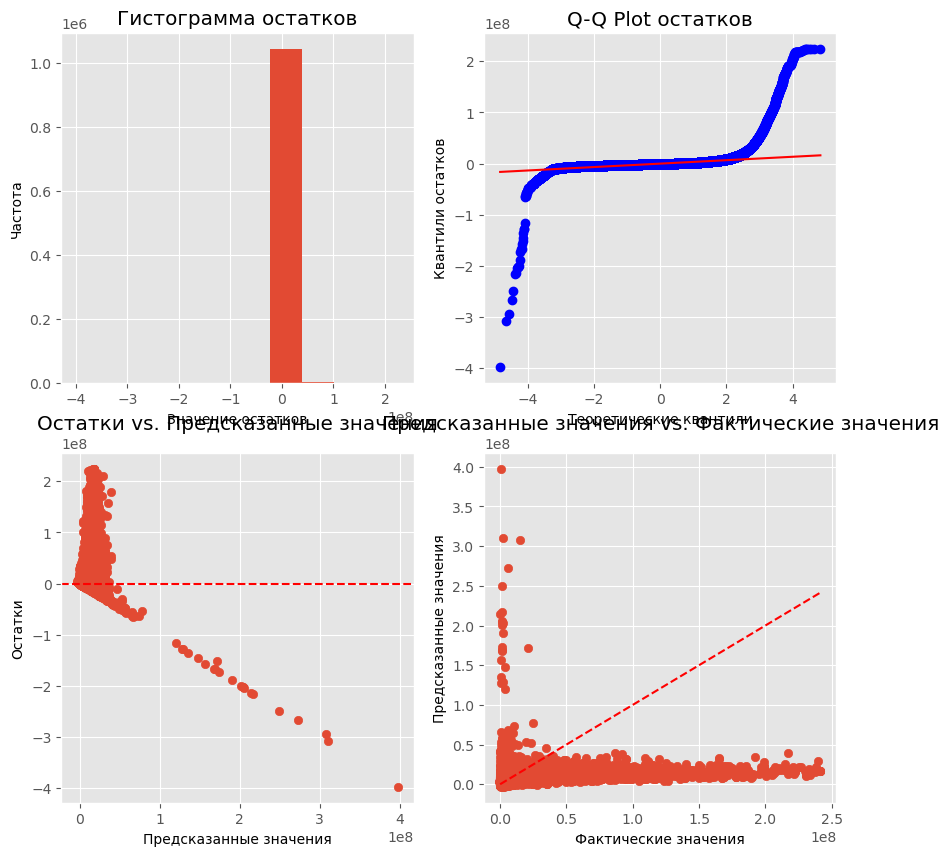

In [ ]:
import statsmodels.api as sm

# Получение остатков модели
residuals = y_test - predictions

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')

Стало немного лучше.

#### 3 модель. L1-регуляризация (Lasso-регрессия)

In [ ]:
model = Lasso()

model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

x_test_st = scaler.transform(x_test)
predictions = model.predict(x_test_st)
r2_score(y_test, predictions)

[ 632370.43736352  250576.27057473  134442.73199857   96871.68943822
  946585.77792741  861163.5310576  1313043.39058573  945236.26690042
 -143868.04413372] 4415338.322414949


0.22151259121220468

Еще лучше.

#### 4 модель. L2-регуляризация (Ridge-регрессия)

In [ ]:
model = Ridge()

model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

x_test_st = scaler.transform(x_test)
predictions = model.predict(x_test_st)
r2_score(y_test, predictions)

[ 632371.89137396  250577.87731148  134443.67512054   96870.48137894
  946587.85332209  861163.97170091 1313043.56703948  945236.73162271
 -143869.38976338] 4415338.322414949


0.2215125936294653

C:\Users\Zatse\AppData\Local\Temp\ipykernel_16316\2237335486.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


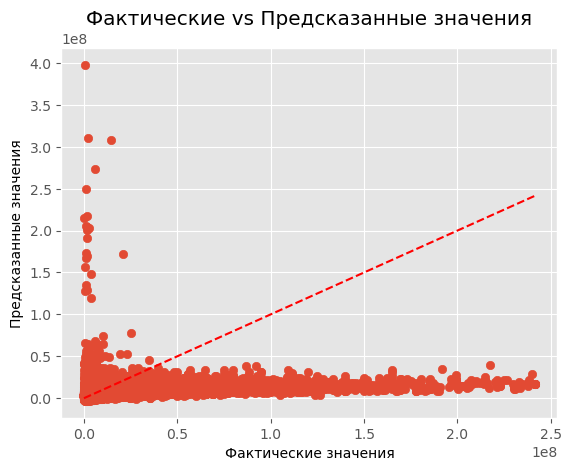

In [ ]:
#Визуализируем
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.show()

Слегка слегка лучше, чем в прошлой модели.

### Попробуем взять факторы, связанные с площадью 

In [ ]:
y = df['price']
x = df[['area', 'kitchen_area']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

#### 1 модель. LR - линейная регрессия

In [ ]:
model = LinearRegression()

# обучим нашу модель
model.fit(x, y)

# напечатаем коэффициенты
print(model.coef_, model.intercept_)

y_pred = model.predict(x)

r2_score(y, y_pred)

[ 50266.77510992 215997.94812834] -581264.9050352955


0.17869327959094827

Значение коэффициента детерминации стало еще меньше, нужно изменить факторы.

### Возьмем факторы, которые связаны с этажами

In [ ]:
y = df['price']
x = df[['level', 'levels']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

#### 1 модель. LR - линейная регрессия

In [ ]:
model = LinearRegression()

# обучим нашу модель
model.fit(x, y)

# напечатаем коэффициенты
print(model.coef_, model.intercept_)

y_pred = model.predict(x)

r2_score(y, y_pred)

[ 38511.92065513 159109.54557138] 2358470.054374762


0.040774259182978834

Все стало еще хуже, ищем другие факторы.

### Возьмем факторы, напрямую связанные с квартирой

In [ ]:
y = df['price']
x = df[['area', 'rooms', 'level', 'building_type', 'object_type', 'levels', 'kitchen_area']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

#### 1 модель. LR - линейная регрессия

In [ ]:
model = LinearRegression()

# обучим нашу модель
model.fit(x, y)

# напечатаем коэффициенты
print(model.coef_, model.intercept_)

y_pred = model.predict(x)

r2_score(y, y_pred)

[ 38976.68068296 814334.05180434  19040.67498761 151150.94514807
 -38028.53232341 149880.79683346 166973.18901771] -2859386.195439185


0.215221684041338

Коэффициент стал лучше чем был, но хуже, чем при использовании всех факторов. Думаю, пора остановиться.

<div class="alert alert-block alert-success">
<b>Вывод:</b><br>
    Самой лучшей из исследованных моделей оказалась модель L2-регуляризация (Ridge-регрессия), построенная по всем факторам сразу. Коэффициент детерминации при таком способе составил 0.224596, следовательно, 22.5% вариации зависимой переменной 'price' определяются вариацией независимых переменных 'year', 'month','building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type'.

[Вернуться к навигации](#9th)